In [1]:
#install the required libraries

!pip install category_encoders

# Data Preparation

## Data Loading

In [2]:
# Import library

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_customer = pd.read_csv('/content/customers_dataset.csv')

In [4]:
df_geolocation = pd.read_csv('/content/geolocation_dataset.csv')

In [5]:
df_order_items = pd.read_csv('/content/order_items_dataset.csv')

In [6]:
df_order_payments = pd.read_csv('/content/order_payments_dataset.csv')

In [7]:
df_orders = pd.read_csv('/content/orders_dataset.csv')

In [8]:
df_reviews = pd.read_csv('/content/order_reviews_dataset.csv')

In [9]:
df_product_category = pd.read_csv('/content/product_category_name_translation.csv')

In [10]:
df_product = pd.read_csv('/content/products_dataset.csv')

In [11]:
df_sellers = pd.read_csv('/content/sellers_dataset.csv')

## Data Understanding

In [12]:
# View the first 5 data
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [13]:
# Display information related to the dataset

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
# See whether or not there are missing values

df_customer.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [15]:
# View descriptive statistics on the dataset

df_customer.describe(exclude='number').T

,count,unique,top,freq
customer_id,99441,99441,06b8999e2fba1a1fbc88172c00ba8bc7,1
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17
customer_city,99441,4119,sao paulo,15540
customer_state,99441,27,SP,41746


In [16]:
# View the first 5 data
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [17]:
# Display information related to the dataset

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
# See whether or not there are missing values

df_orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


From the table it can be seen that there are missing values in the order dataset

In [19]:
# View the first 5 data
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
# Display information related to the dataset

df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
# See whether or not there are missing values

df_order_items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [22]:
# Merge customer dataset and order dataset

df_customer_order = pd.merge(df_orders, df_customer[['customer_id', 'customer_city', 'customer_state']], on="customer_id", how='left')

In [23]:
df_customer_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,santo andre,SP


In [24]:
df_customer_order.describe(include="all").T

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522
customer_city,99441,4119,sao paulo,15540
customer_state,99441,27,SP,41746


---

We already know that the data in the order dataset has missing values, let's find out the underlying cause by looking at the presence or absence of order items in the order dataset.

In [25]:
# Add an isExisting feature to check for existing values

list_order_item = list(df_order_items["order_id"].unique())

df_customer_order["isExist"] = df_customer_order["order_id"].apply(lambda x: 'yes' if x in list_order_item else "no")

In [26]:
df_customer_order['isExist'].value_counts()

,count
isExist,
yes,98666
no,775


There are 775 orders that do not have an order item

In [27]:
df_customer_order.shape

(99441, 11)

In [28]:
# Merge customer order dataset and order item dataset

df_customer_order = pd.merge(df_customer_order, df_order_items, on="order_id", how='left')

In [29]:
df_customer_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,isExist,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,sao paulo,SP,yes,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,barreiras,BA,yes,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,vianopolis,GO,yes,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,sao goncalo do amarante,RN,yes,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,santo andre,SP,yes,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [30]:
df_customer_order.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,161
order_delivered_carrier_date,1968
order_delivered_customer_date,3229
order_estimated_delivery_date,0
customer_city,0
customer_state,0


---
Next we merge the entire dataset needed for further analysis and handling of missing values.

In [31]:
df_customer_order = pd.merge(df_customer_order, df_order_payments, on="order_id", how='left')

In [32]:
df_customer_order = pd.merge(df_customer_order, df_product, on="product_id", how='left')

In [33]:
df_customer_order = pd.merge(df_customer_order, df_sellers, on="seller_id", how='left')

In [34]:
df_customer_order = pd.merge(df_customer_order, df_reviews, on="order_id", how='left')

In [35]:
df_customer_order.shape

(119143, 38)

In [36]:
df_customer_order.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,177
order_delivered_carrier_date,2086
order_delivered_customer_date,3421
order_estimated_delivery_date,0
customer_city,0
customer_state,0


## Exploratory Data Analysis (EDA)

In [37]:
# Import library

import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = ['#01d1ff', "#e5c852"]

# Set the Seaborn style with a custom color palette
sns.set(style="whitegrid", palette=custom_palette)

In [38]:
def plot_bar(dataframe, title_, size_=(15,10), rot_=30, all='no', percentage='yes', annot_offset=1):
  """
  Plot a bar chart with annotations for 5 most high values
  """
  if all == 'no':
    dataframe = dataframe.head()

  ax = dataframe.plot(
      kind='bar',
      figsize=size_,
      rot=rot_,
      title=title_
  )

  annotate_bars(ax, dataframe, textsize=12, percentage=percentage, annot_offset=annot_offset)

  plt.ylabel(f'Count of {title_}')

  plt.show()



def annotate_bars(ax, dataframe, colour="black", textsize=12, percentage='yes', annot_offset=1):
    """
    Add value annotations to the bars
    """

    total_count = dataframe.sum()

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(), 1))
        percentage_value = str(round((p.get_height() / total_count) * 100,1))

        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            f'{value}\n({percentage_value}%)' if percentage == 'yes' else f'{value}',
            (p.get_x() + p.get_width()/2, p.get_y() + p.get_height() + annot_offset),
            ha='center',
            va='bottom',
            color=colour,
            size=textsize
        )

In [39]:
def plot_line(dataframe, title_, size_=(15,10), rot_=30, x_size=3, agg='Count'):
    """
    Plot a line chart with annotations
    """

    ax = dataframe.plot(
        kind="line",
        figsize=size_,
        rot=rot_,
        title=title_,
        marker='o',
        markerfacecolor='#01d1ff',
        markeredgecolor='#01d1ff'
    )

    annotate_points(ax, dataframe, textsize=10)

    # plot marker for max value
    max_value = dataframe.max()
    max_index = dataframe.idxmax()
    ax.plot(max_index, max_value, marker='o', markersize=8, color="red")

    ax.axvline(x=max_index, color='red', linestyle='--', linewidth=1.5)

    # label for vertical line
    ax.text(max_index, 0,
            f'{max_index.strftime("%Y-%m")}',
            color='red',
            ha='left',
            va='bottom',
            fontsize=12)

    plt.xticks(ticks=dataframe.index[::x_size], labels=dataframe.index[::x_size].strftime('%Y-%m'))

    plt.ylabel(f'{agg} of {title_}')
    plt.show()


def annotate_points(ax, dataframe, colour="black", textsize=8):
    """
    Add value annotations to the points on a line
    """

    # Find the maximum value and its corresponding index
    max_value = dataframe.max()
    max_index = dataframe.idxmax()

    # Annotate only the maximum point
    ax.annotate(
        str(round(max_value, 1)),
        (max_index, max_value),
        textcoords="offset points",
        xytext=(0, 8),  # Offset the text slightly above the point
        ha='center',
        color=colour,
        size=textsize
    )

### Customer and Order


***What is the distribution of customers in each state and city based on the number of orders?***

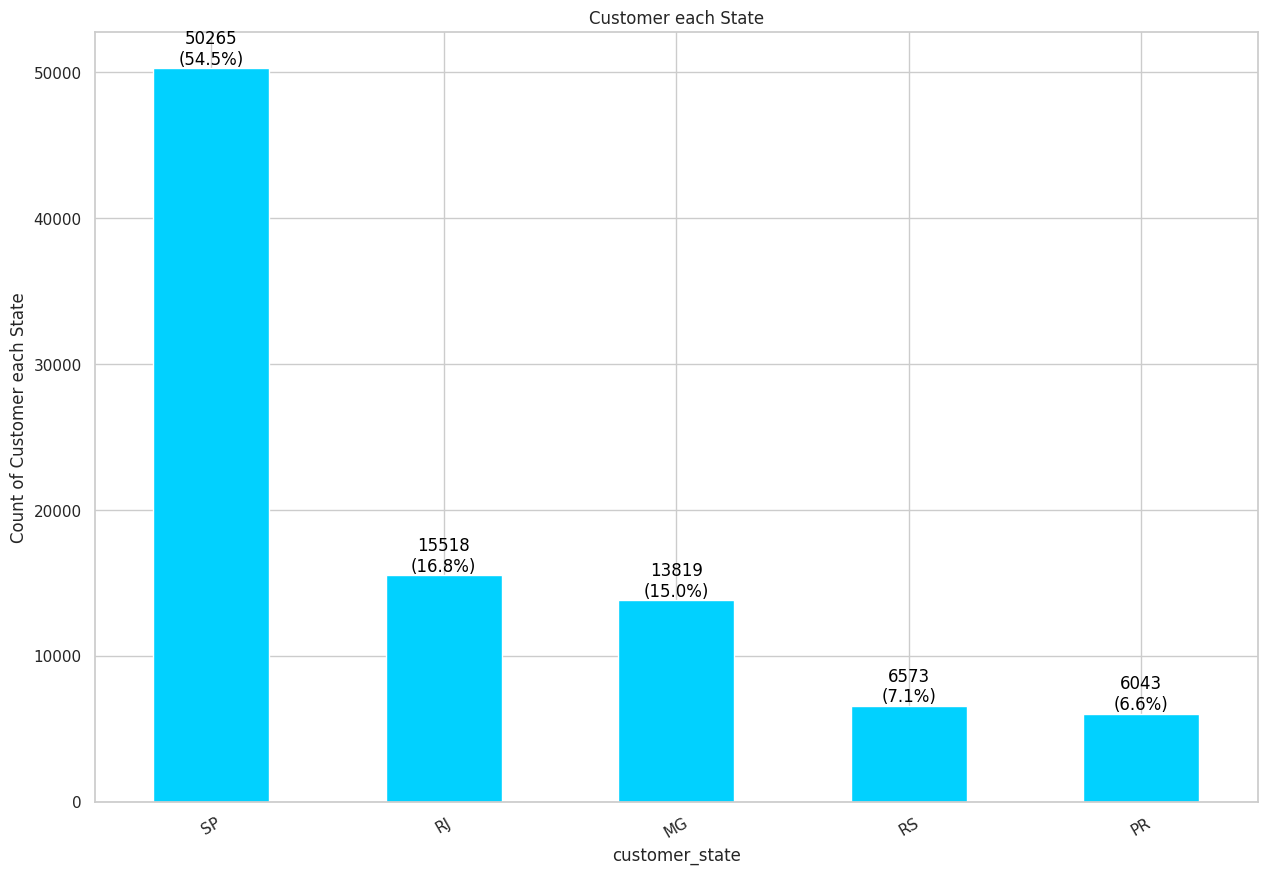

In [40]:
# view the distribution of customer IDs based on their state
count_customer_state = df_customer_order.groupby("customer_state")["customer_id"].count().sort_values(ascending=False)

plot_bar(count_customer_state, "Customer each State")

From the visualization of the bar plot it can be seen that the SP state dominates the distribution of customers with an amount of about 54.5% of the total data

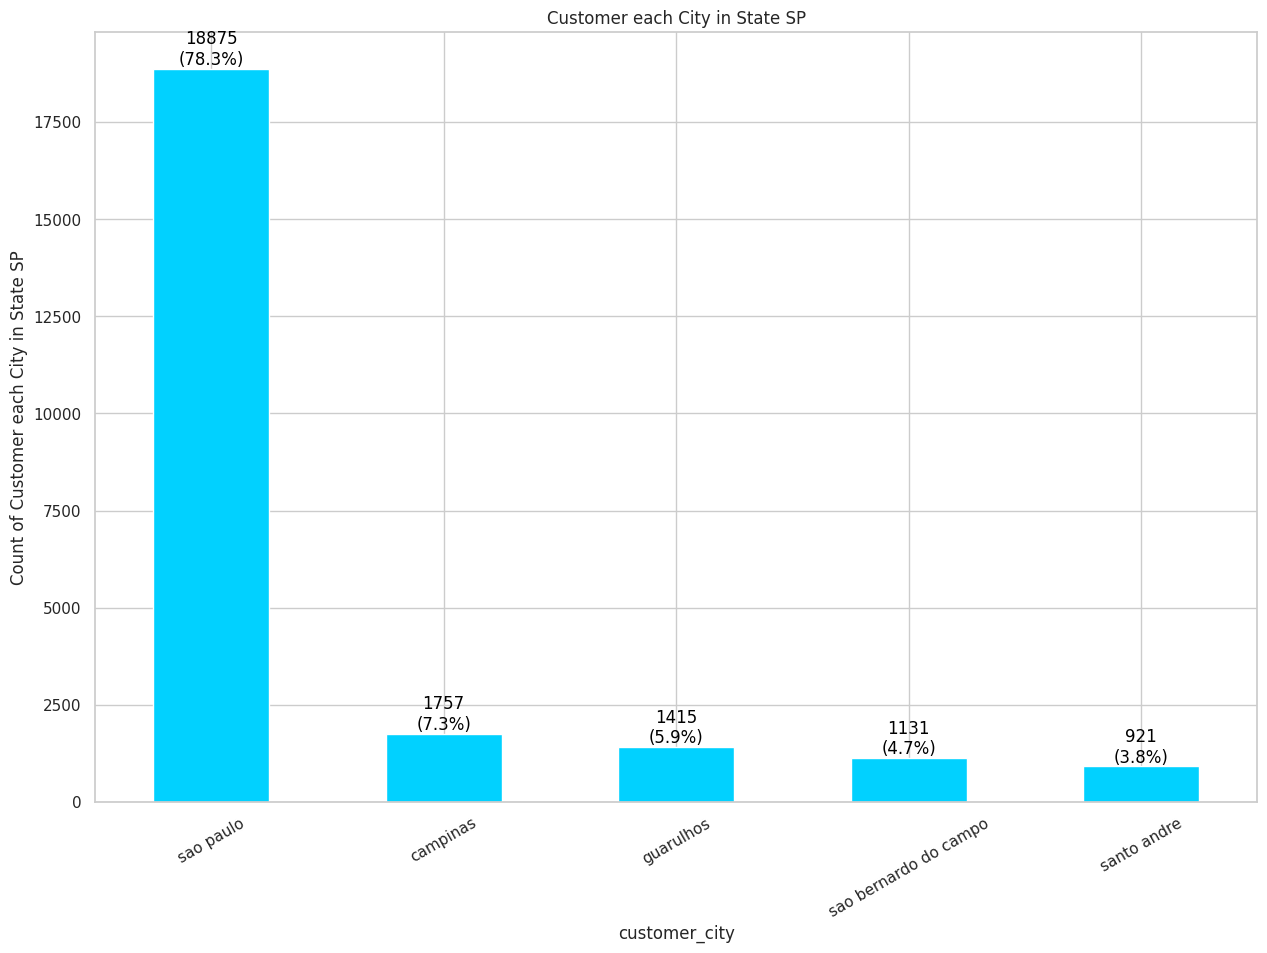

In [41]:
# see the distribution of customers by city with the state that dominates
count_customer_city = df_customer_order.groupby(["customer_state", "customer_city"])["customer_id"].count()

count_customer_SP_city = count_customer_city.loc["SP"].sort_values(ascending=False)

plot_bar(count_customer_SP_city, "Customer each City in State SP")

**conclusion**:

Based on the 2 bar plots above, it can be seen that state SP has the highest number of customers, which is around 54.5% of the total number of customers. Then for the state with the most customers, SP, the city with the most customers is sao paulo with the number of customers around 78.3% of the total number of customers in state SP.

---

1.   ***How customers grow over time based on their orders?***
2.   ***What time do customers usually place their orders?***



In [42]:
# extracting the purchase feature

df_customer_order["purchase_time_year"] = pd.to_datetime(df_customer_order["order_purchase_timestamp"]).dt.year
df_customer_order["purchase_time_month"] = pd.to_datetime(df_customer_order["order_purchase_timestamp"]).dt.month
df_customer_order["purchase_time_day_name"] = pd.to_datetime(df_customer_order["order_purchase_timestamp"]).dt.day_name()
df_customer_order["purchase_time_hour"] = pd.to_datetime(df_customer_order["order_purchase_timestamp"]).dt.hour

In [43]:
# create functions for time segmentation

def time_segment(x):

  if 6 <= x < 12:
    return "morning"
  elif 12 <= x < 18:
    return "afternoon"
  elif 18 <= x <= 23:
    return "evening"
  elif 0 <= x < 6:
    return "night"

In [44]:
df_customer_order["purchase_time"] = df_customer_order["purchase_time_hour"].apply(lambda x: time_segment(x))

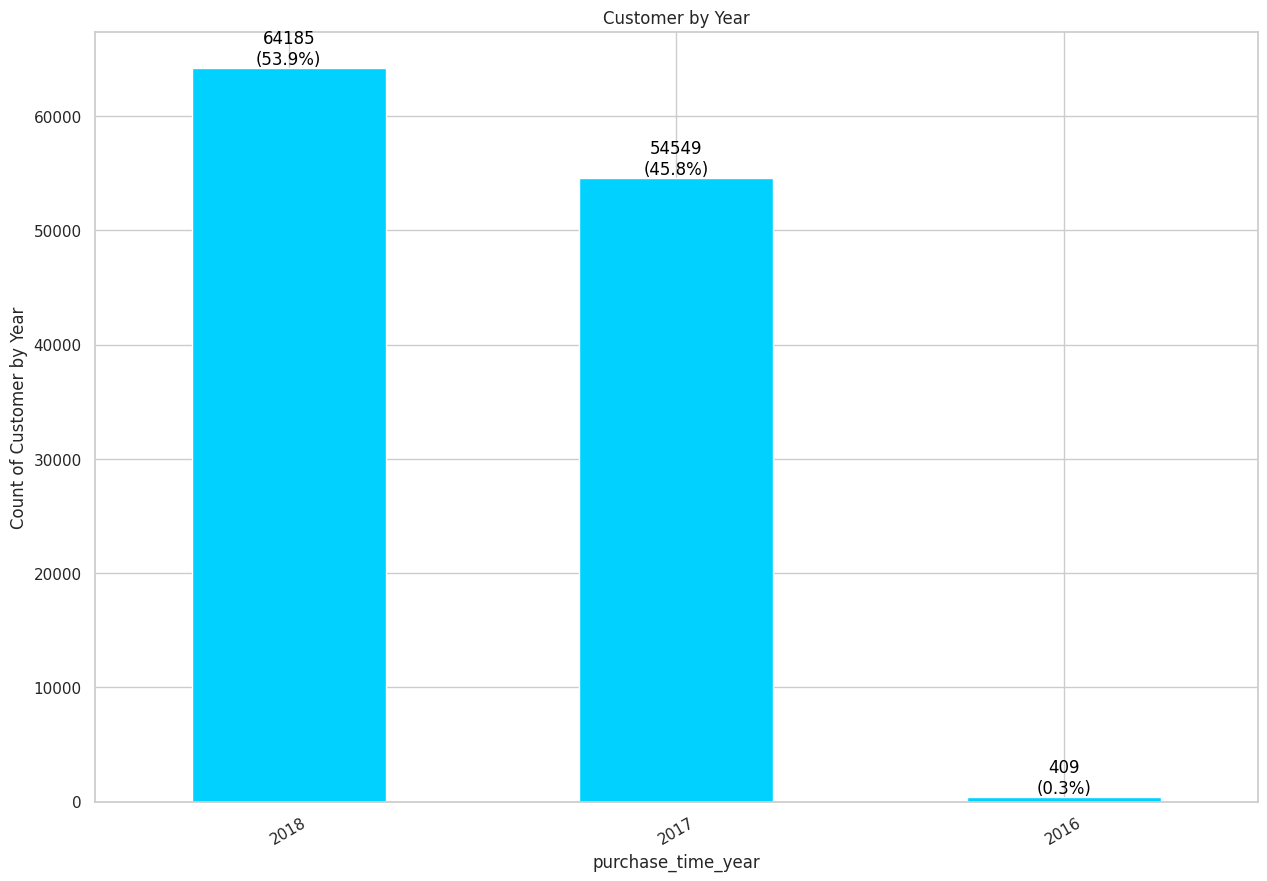

In [45]:
# calculate the number of customers per year

count_customer_year = df_customer_order.groupby(["purchase_time_year"])["customer_id"].count().sort_values(ascending=False)

plot_bar(count_customer_year, "Customer by Year")

Based on the plot bar above, it can be seen that customers have increased from year to year with the highest peak of customers in 2018 with the number of customers around 53.9% of the total customers.

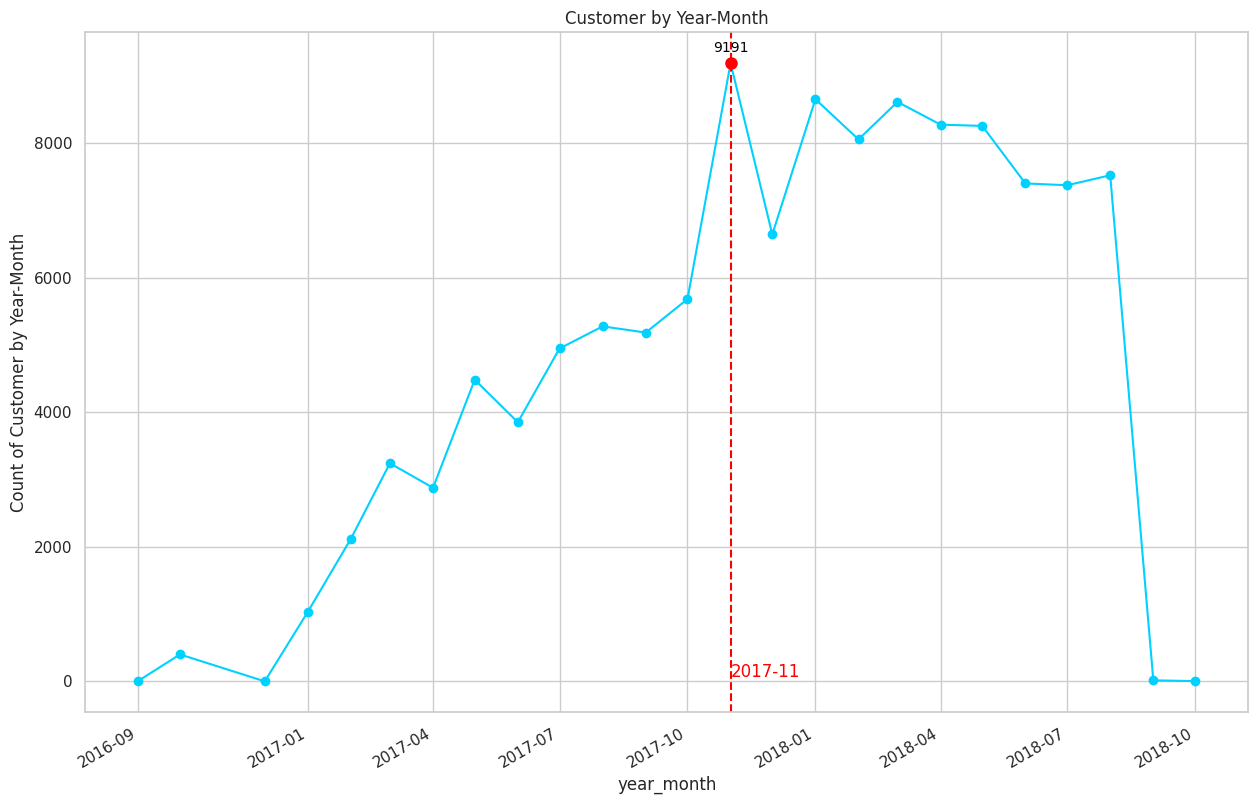

In [46]:
# calculate the number of customers per month from each year

df_customer_month = df_customer_order[['customer_id', 'purchase_time_year', 'purchase_time_month']].copy()

df_customer_month['year_month'] = df_customer_month['purchase_time_year'].astype('str') + '-' + df_customer_month['purchase_time_month'].astype('str')
df_customer_month['year_month'] = pd.to_datetime(df_customer_month['year_month'], format='%Y-%m')

count_customer_month = df_customer_month.groupby(["year_month"])["customer_id"].count().sort_index()

plot_line(count_customer_month, "Customer by Year-Month")

Based on the line plot above, it can be seen that from year to year in each month the customer has increased even though in 2018 August to September to October has decreased. The decline could be a natural occurrence or there is an error in the data (noise). then it can also be seen that the peak of the number of customers occurred in 2017 in November, although overall the largest number of customers was in 2018.

**conclusion**:

Based on the analysis above, it can be seen that customers grow every year. Although from the data it is recorded that 2018 has the most customers, but in the segmentation per month it can be seen that in November 2017 has the highest number of customers.

---

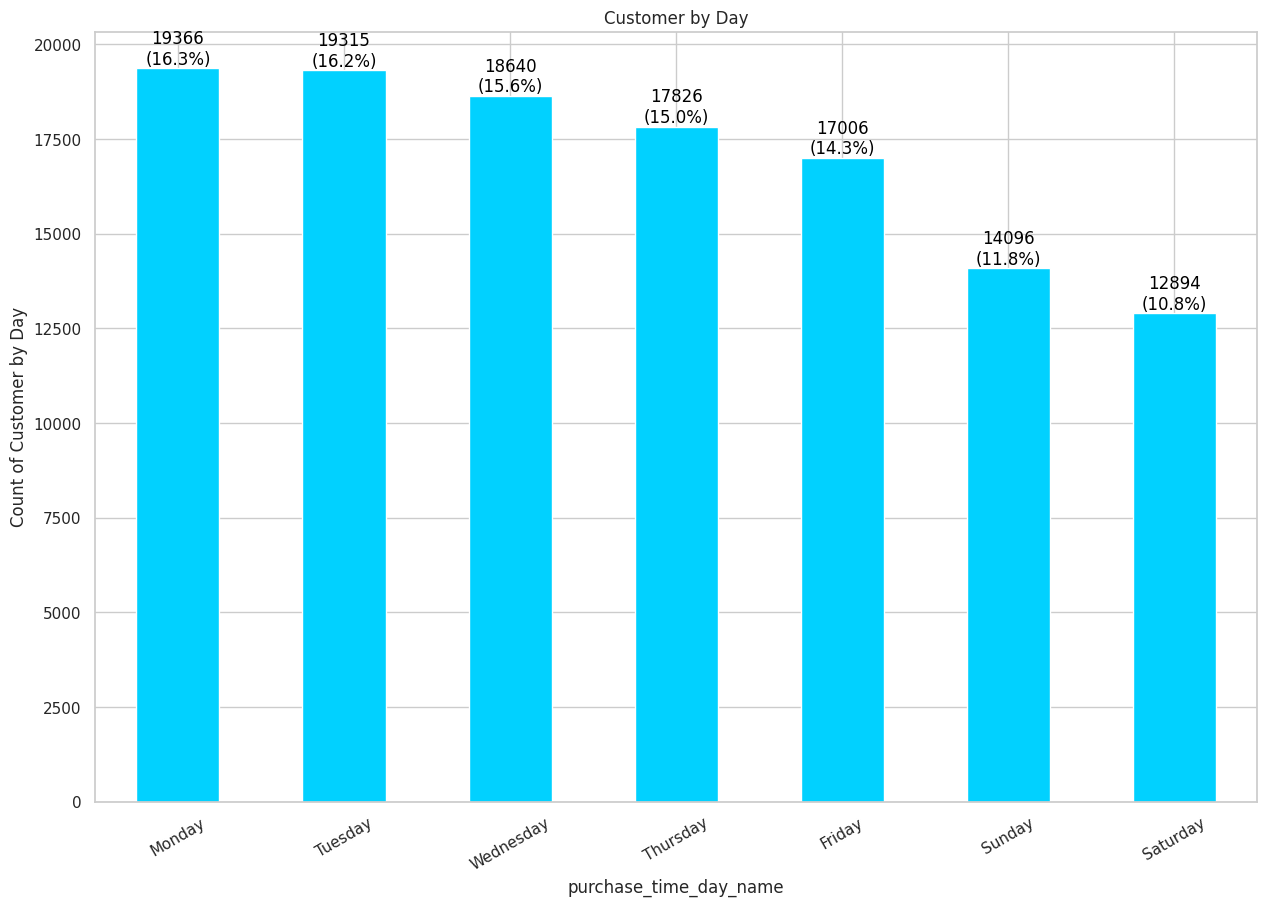

In [47]:
# count the number of customers per day

count_customer_day = df_customer_order.groupby(['purchase_time_day_name'])['customer_id'].count().sort_values(ascending=False)

plot_bar(count_customer_day, "Customer by Day", all='yes')

Based on the plot bar above, it can be seen that customers usually place orders on Monday, which is around 16.3% of the total number of customers who place orders.

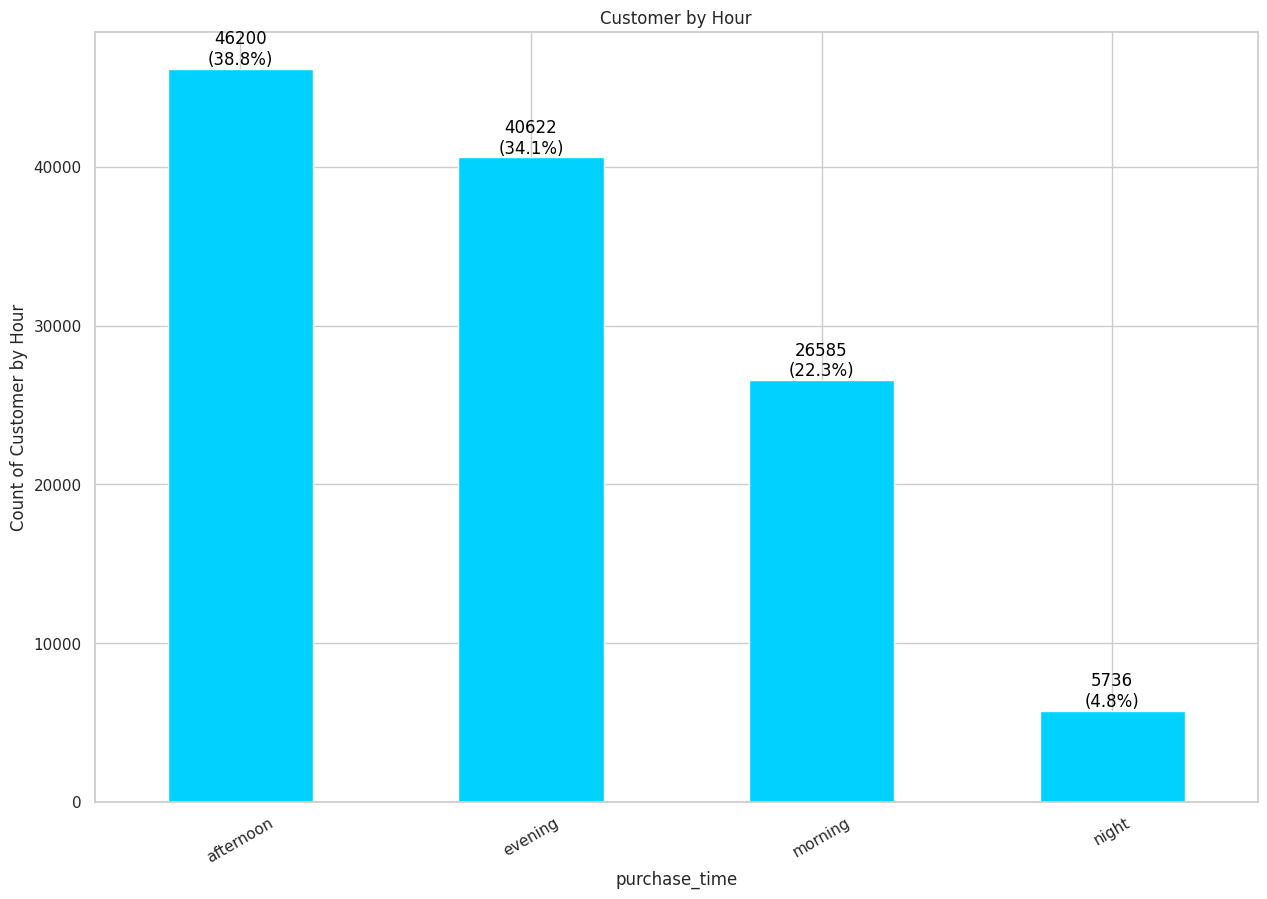

In [48]:
# calculate the number of customers based on time segmentation per day

count_customer_hour = df_customer_order.groupby(['purchase_time'])['customer_id'].count().sort_values(ascending=False)

plot_bar(count_customer_hour, "Customer by Hour")

Based on the plot bar above, it can be seen that customers usually place orders during the day, which amounts to around 38.8% of the total number of customers who place orders.

**conclusion**:

Based on the analysis above, it can be seen that customers place more orders on Monday and on afternoon.

### Deep dive into customers and orders

It can be seen previously that the order dataset has missing values, especially in features related to the order track. in this section we will find out more about the underlying causes.

In [49]:
df_customer_order.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,177
order_delivered_carrier_date,2086
order_delivered_customer_date,3421
order_estimated_delivery_date,0
customer_city,0
customer_state,0


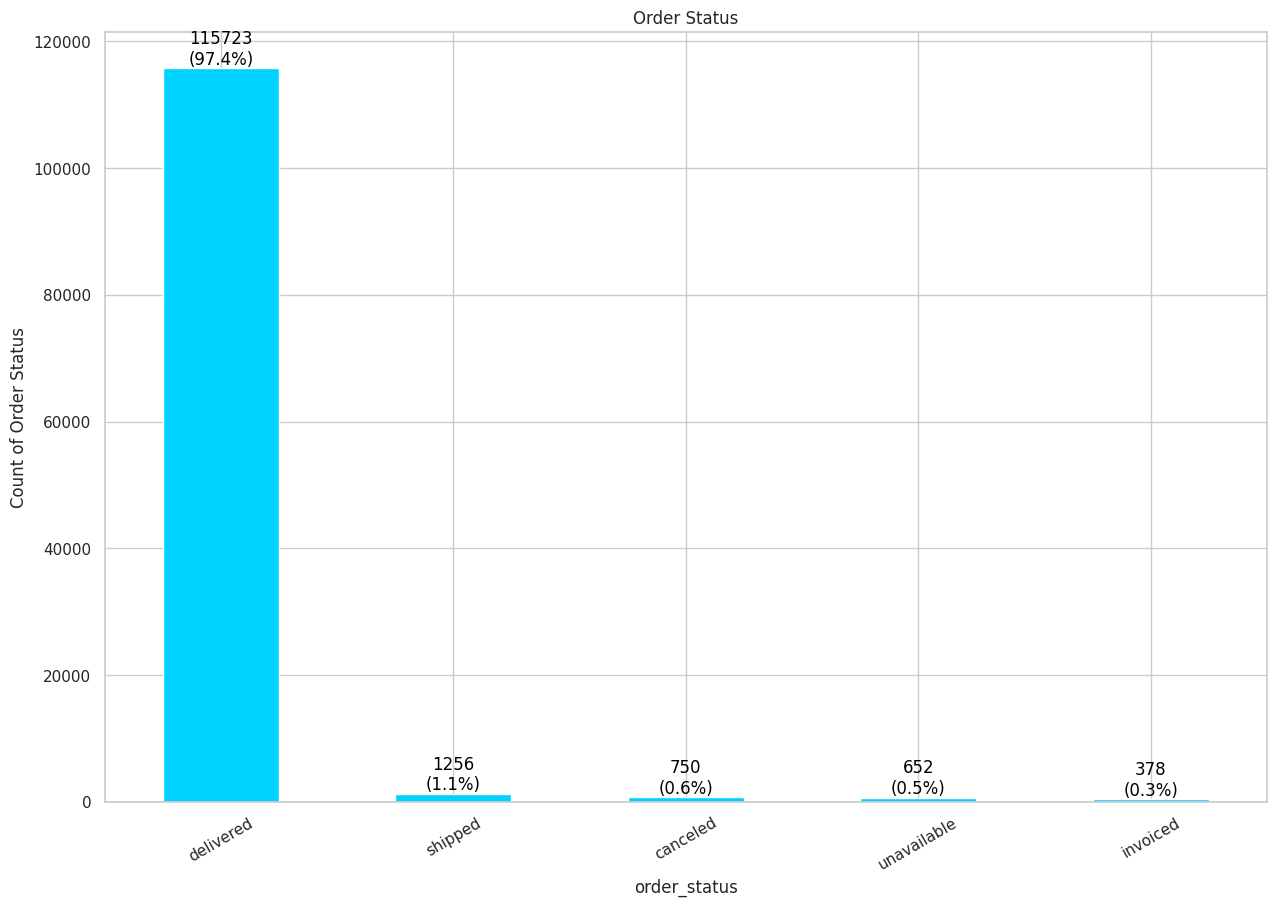

In [50]:
count_order_status = df_customer_order.groupby(['order_status'])['customer_id'].count().sort_values(ascending=False)

plot_bar(count_order_status, "Order Status")

It can be seen from the plot bar that the dominating order status is delivered, which means that the ordered goods have reached the customer.

In [51]:
# performs time segmentation checking based on order type

df_checking = df_customer_order[['order_status','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'isExist']].copy()

In [52]:
# split the dataset into without missing values and with missing values

with_nan = df_checking[(df_checking.isna().any(axis=1))]
without_nan = df_checking[~(df_checking.isna().any(axis=1))]

In [53]:
with_nan['isExist'].value_counts()

,count
isExist,
yes,2604
no,833


It can be seen that the data of the order track time which has a missing value is still recorded as having an order item.

In [54]:
with_nan.groupby('order_status')['isExist'].value_counts().sort_values(ascending=False)

,,count
order_status,isExist,
shipped,yes,1255
unavailable,no,645
canceled,yes,563
invoiced,yes,376
processing,yes,376
canceled,no,180
delivered,yes,24
unavailable,yes,7
created,no,5


It can be seen from the table above that the data is dominated by the shipped order status which still has an order item, followed by the unavailable status which does not have an order item, and so on.

In [55]:
with_nan[with_nan['isExist']=='yes']['order_status'].value_counts()

,count
order_status,
shipped,1255
canceled,563
invoiced,376
processing,376
delivered,24
unavailable,7
approved,3


It can also be seen from the table above that the order status that has an order item is dominated by shipped, followed by canceled, and so on.

**conclusion**:

So it can be seen that there are indeed missing values in the order data based on order statuses such as shipped, canceled, unavailable, and so on which are still reasonable.

In [56]:
without_nan['isExist'].value_counts()

,count
isExist,
yes,115706


In [57]:
without_nan.groupby('order_status')['isExist'].value_counts().sort_values(ascending=False)

,,count
order_status,isExist,
delivered,yes,115699
canceled,yes,7


As expected, data with no missing values must have order items and are dominated by delivered order status.

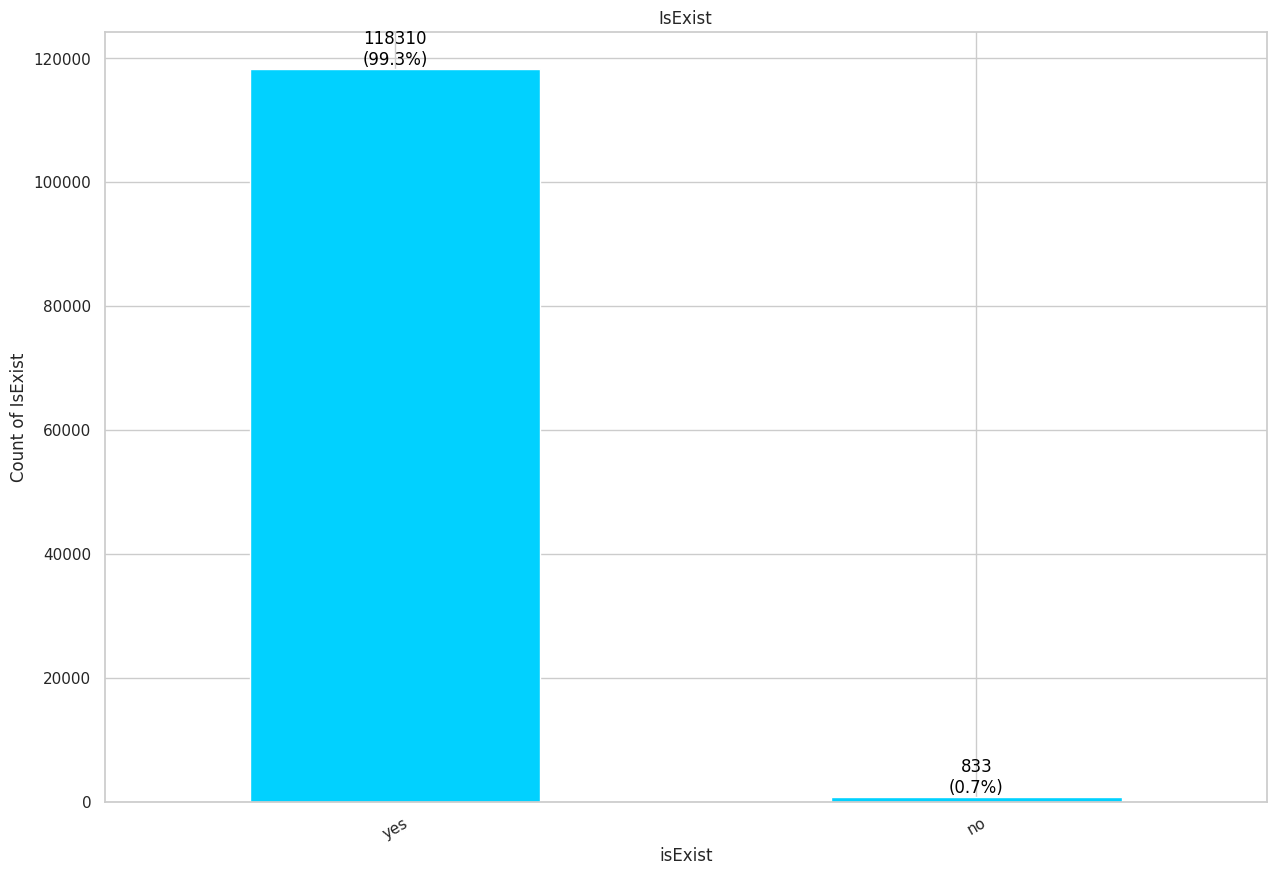

In [58]:
# counts the number of orders that have an order item

count_isExist = df_customer_order.groupby(['isExist'])['customer_id'].count().sort_values(ascending=False)

plot_bar(count_isExist, "IsExist")

From the visualization, it can be seen that the data that has order items dominates, which is around 99.3% of the total data. Therefore, for the next step, data that does not have missing values and the order stature is delivered will be taken. This is done for several reasons:


1. we can ignore the data that does not have an order item because it is only about 0.7% of the data.

2. if we want to fill the missing value with a value, then it doesn't make sense, because we can't get the time feature from data without order items or data with unfinished order status (shipped, canceled, unavailable, and so on).

In [59]:
df_order_without_nan = df_customer_order[~(df_customer_order[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1)) & (df_customer_order['order_status']=='delivered')].reset_index(drop=True)

In [60]:
df_order_without_nan['order_status'].value_counts()

,count
order_status,
delivered,115699


In [61]:
df_order_without_nan['isExist'].value_counts()

,count
isExist,
yes,115699


In [62]:
df_order_without_nan.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
customer_city,0
customer_state,0


---

***how long does it take for the average order to reach the customer?***

In [63]:
# change the data type of some features

df_order_without_nan["order_purchase_timestamp"] = pd.to_datetime(df_order_without_nan["order_purchase_timestamp"])
df_order_without_nan["order_estimated_delivery_date"] = pd.to_datetime(df_order_without_nan["order_estimated_delivery_date"])
df_order_without_nan["order_delivered_customer_date"] = pd.to_datetime(df_order_without_nan["order_delivered_customer_date"])
df_order_without_nan["order_delivered_carrier_date"] = pd.to_datetime(df_order_without_nan["order_delivered_carrier_date"])
df_order_without_nan["order_approved_at"] = pd.to_datetime(df_order_without_nan["order_approved_at"])

In [64]:
def length_delivery(df):
  """
  Calculate the delivery duration in days
  """


  df["order_purchase_timestamp"] = df["order_purchase_timestamp"].dt.date
  df["order_estimated_delivery_date"] = df["order_estimated_delivery_date"].dt.date

  df["order_approved_at"] = df["order_approved_at"].dt.date
  df["order_delivered_carrier_date"] = df["order_delivered_carrier_date"].dt.date
  df["order_delivered_customer_date"] = df["order_delivered_customer_date"].dt.date

  try:

    delivery_time = df["order_delivered_customer_date"] - df["order_approved_at"]

    df["delivery_day_time"] = [abs(day.days) for day in delivery_time]

    return df

  except Exception as e:
    print(e)


In [65]:
df_order_without_nan = length_delivery(df_order_without_nan)

In [66]:
df_order_without_nan

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,purchase_time_year,purchase_time_month,purchase_time_day_name,purchase_time_hour,purchase_time,delivery_day_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,sao paulo,SP,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017,10,Monday,10,morning,8
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,sao paulo,SP,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017,10,Monday,10,morning,8
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,sao paulo,SP,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017,10,Monday,10,morning,8
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,barreiras,BA,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,2018,7,Tuesday,20,evening,12
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,vianopolis,GO,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,2018,8,Wednesday,8,morning,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115694,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02,praia grande,SP,...,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,2018,2,Tuesday,12,afternoon,22
115695,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27,nova vicosa,BA,...,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,2017,8,Sunday,14,afternoon,25
115696,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15,japuiba,RJ,...,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,2018,1,Monday,21,evening,17
115697,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15,japuiba,RJ,...,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,2018,1,Monday,21,evening,17


In [67]:
df_order_without_nan['delivery_day_time'].describe().T

,delivery_day_time
count,115699.000000
mean,11.910950
std,9.422045
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,208.000000


***conclusion***:

for the length of delivery to the customer, on average, it takes about 12 days in the range of a minimum of the same day or a maximum of 208 days.

***How do customers pay for their orders?***

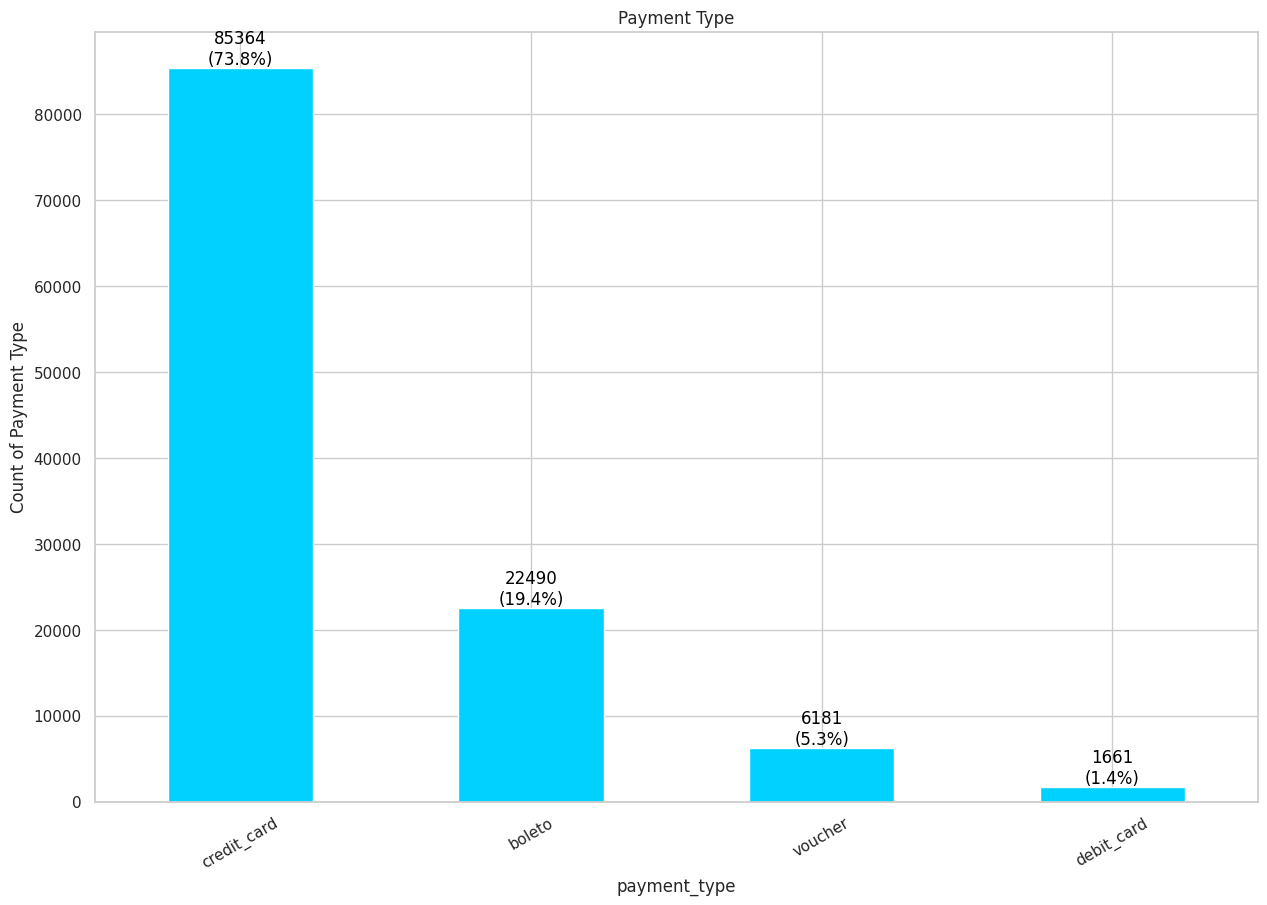

In [68]:
count_type_order = df_order_without_nan.groupby(['payment_type'])['customer_id'].count().sort_values(ascending=False)

plot_bar(count_type_order, "Payment Type")

***conclusion***:

Based on the bar plot above, it can be seen that 78.3% of customers make more payments by credit card.

***How do sales in e-commerce grow over time based on customer orders?***

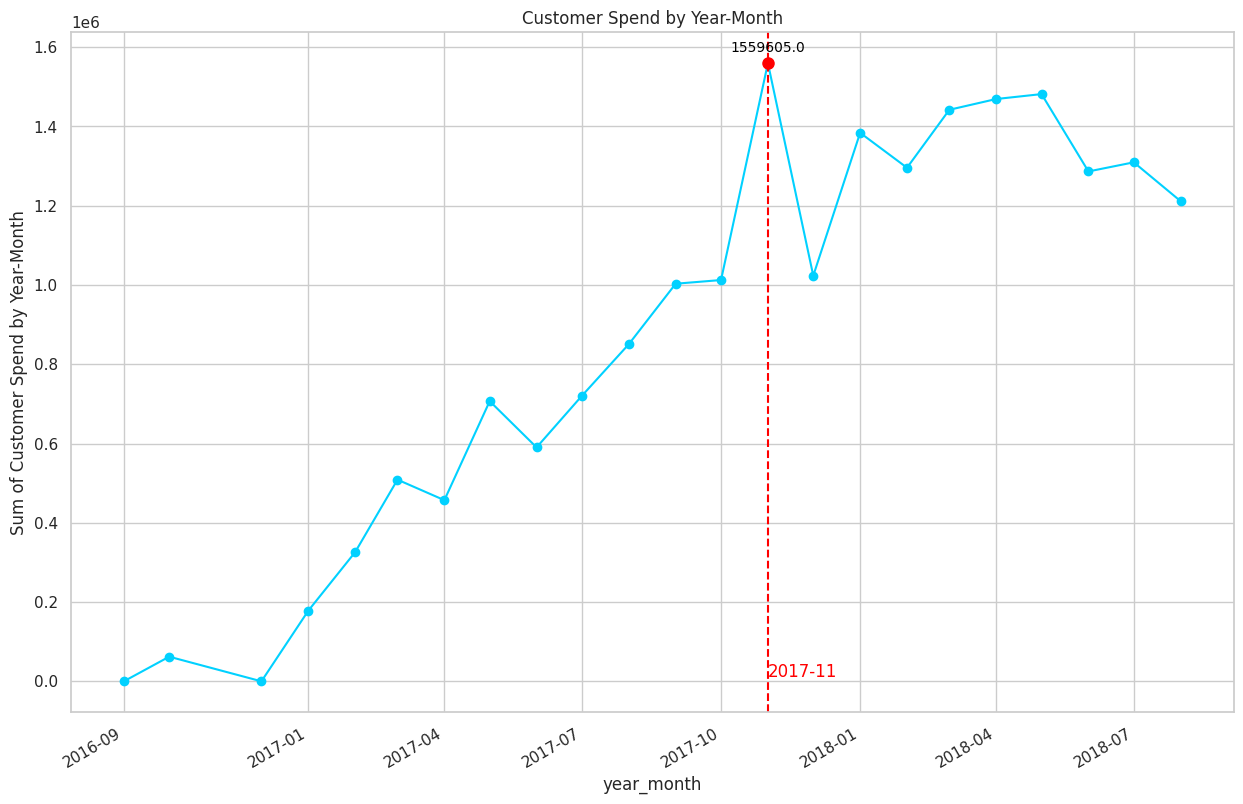

In [69]:
# melihat penjualan berdasarkan bulan dari setiap tahunnya

df_customer_spend = df_order_without_nan[['purchase_time_year', 'purchase_time_month', 'payment_value']].copy()

df_customer_spend['year_month'] = df_customer_spend['purchase_time_year'].astype('str') + '-' + df_customer_spend['purchase_time_month'].astype('str')
df_customer_spend['year_month'] = pd.to_datetime(df_customer_spend['year_month'], format='%Y-%m')

customer_spend = df_customer_spend.groupby(["year_month"])["payment_value"].sum().sort_index()

plot_line(customer_spend, "Customer Spend by Year-Month", agg='Sum')

**conclusion**:

Based on the above visualization, it can be seen that sales in e-commerce every month of the year tend to increase and the peak is in November 2017.

### Product

In [70]:
df_ecommerce = df_order_without_nan

In [71]:
df_ecommerce.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
customer_city,0
customer_state,0


Based on the table, it can be seen that some features in the product dataset have missing values.

In [72]:
# change product name into English

def convert_english_name(x):

  if x in df_product_category['product_category_name'].values:
    return df_product_category[df_product_category['product_category_name']==x]['product_category_name_english'].values[0]

  else:
    return 'unknown'

In [73]:
df_ecommerce['product_category_name'] = df_ecommerce['product_category_name'].apply(lambda x: convert_english_name(x))

***What products sell more in e-commerce?***

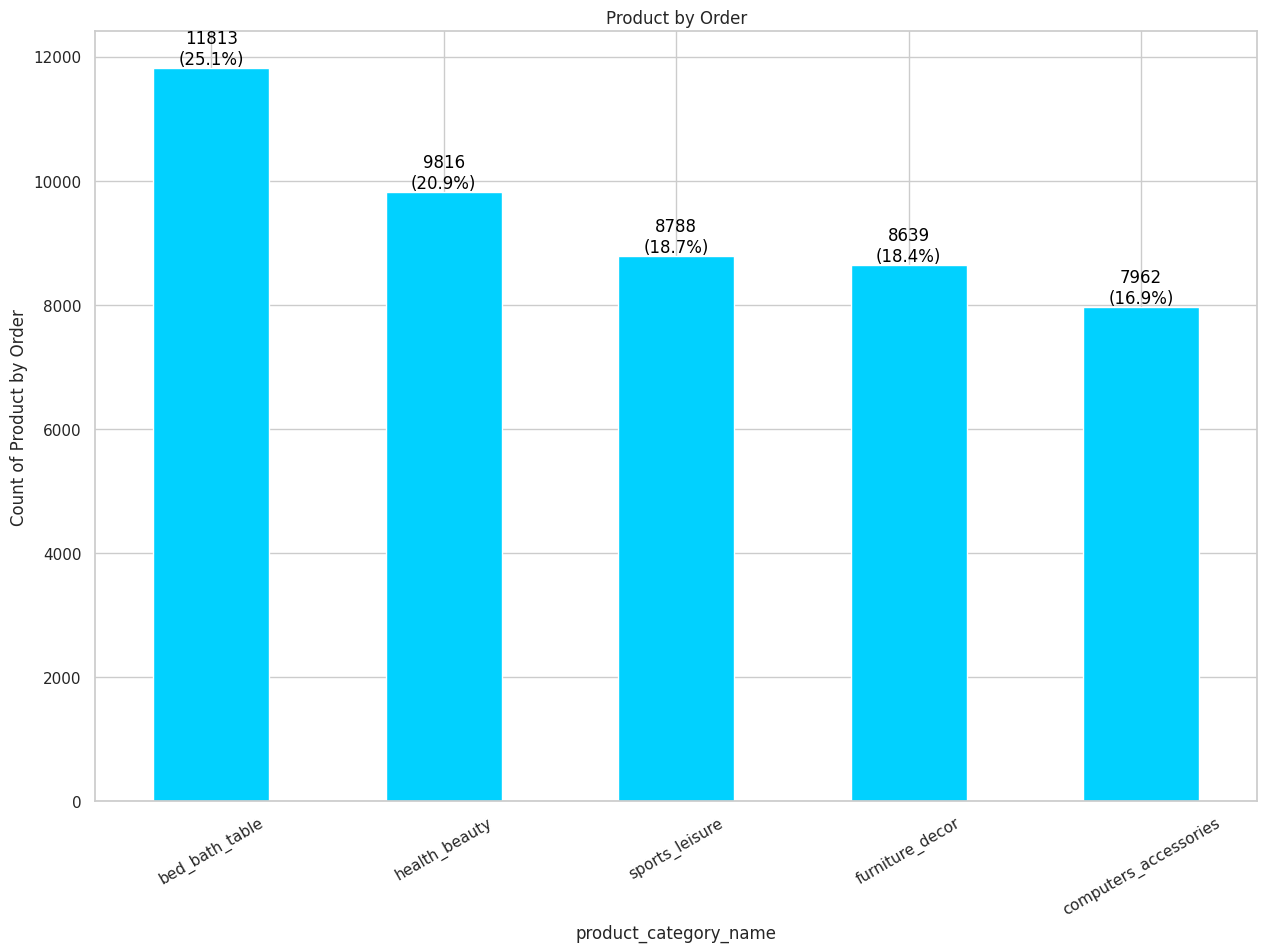

In [74]:
# calculate the order quantity based on product category

count_product_order = df_ecommerce.groupby(["product_category_name"])["order_id"].count().sort_values(ascending=False)

plot_bar(count_product_order, "Product by Order")

We can see from the plot bar that the bed_bath_table category product has the highest number of orders, which is around 25.1%.

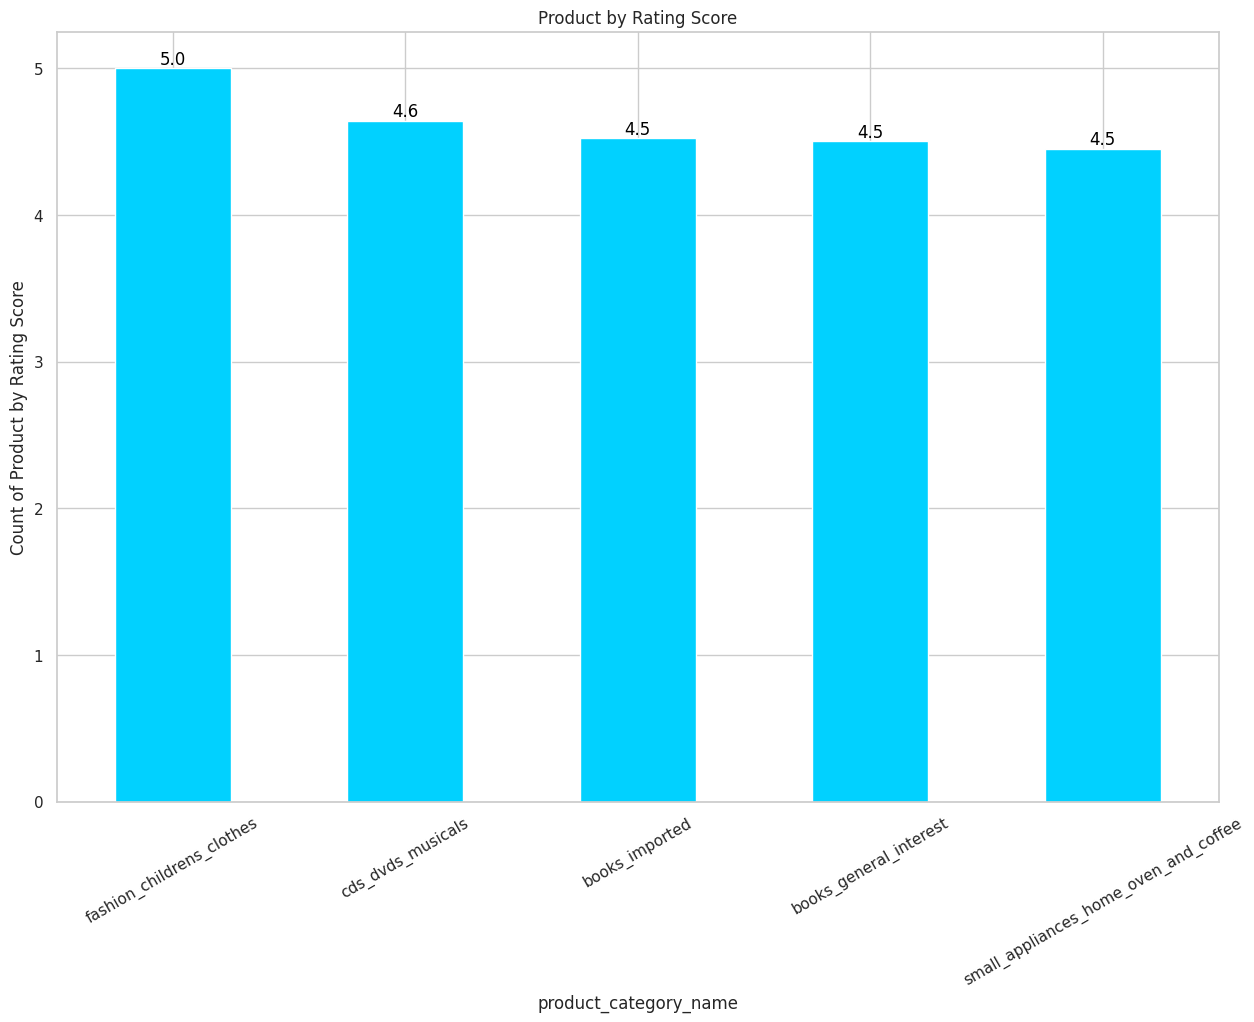

In [75]:
# see product reviews for each product category
count_product_rating_score = df_ecommerce.groupby(["product_category_name"])["review_score"].mean().sort_values(ascending=False)

plot_bar(count_product_rating_score, "Product by Rating Score", percentage='no', annot_offset=0)


Based on the bar plot, it can be seen that products in the fashion_childrens_clothes category have a better review score than other category products, although the most orders are still for products in the bed_bath_table category.

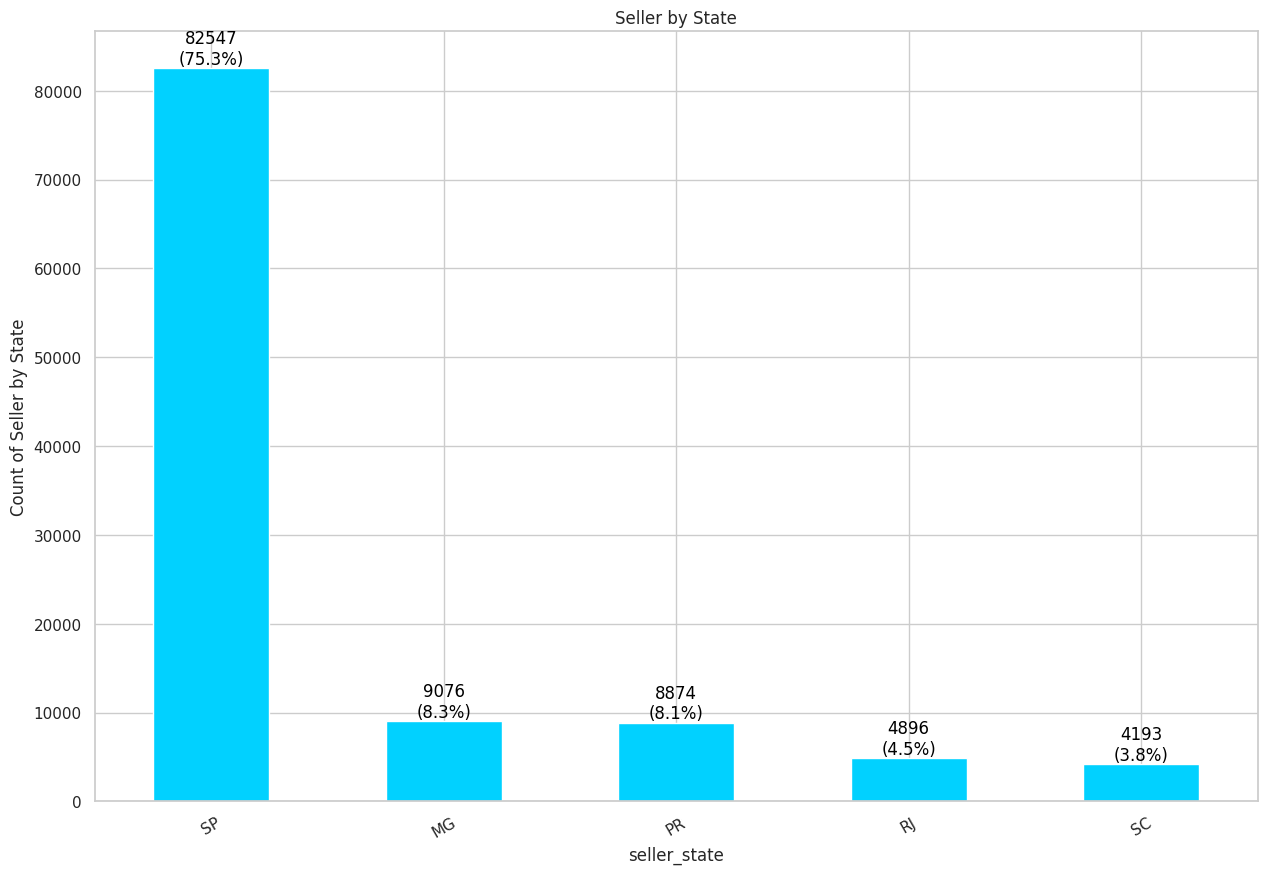

In [76]:
# see the most orders based on the seller's state

count_seller_state = df_ecommerce.groupby(["seller_state"])["order_id"].count().sort_values(ascending=False)

plot_bar(count_seller_state, "Seller by State")

Based on the bar plot, it can be seen that sellers with SP state have the most orders, namely around 75.3%

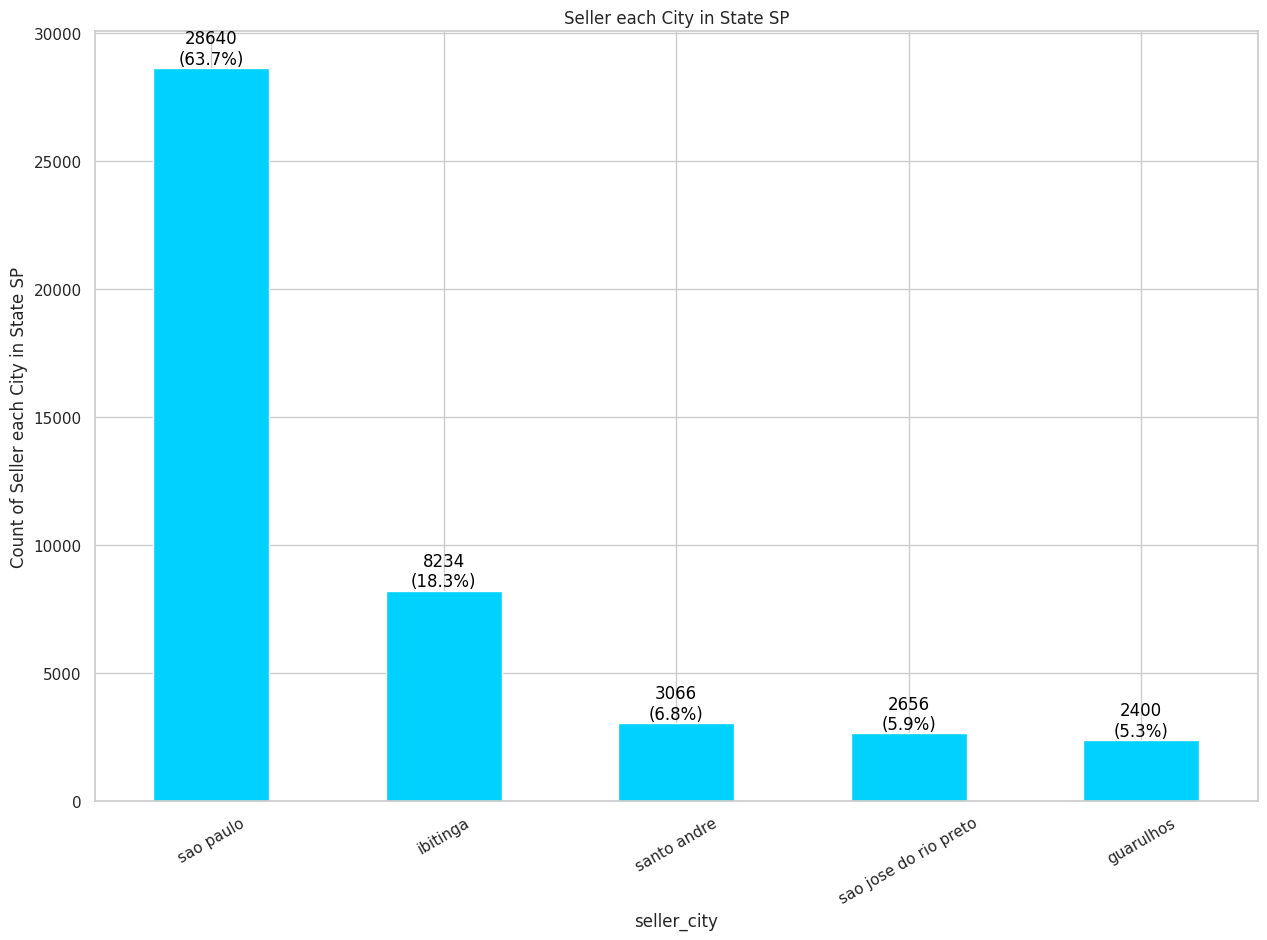

In [77]:
# see the number of orders based on city from state SP

count_seller_city = df_ecommerce.groupby(["seller_state", "seller_city"])["order_id"].count()

count_seller_SP_city = count_seller_city.loc["SP"].sort_values(ascending=False)

plot_bar(count_seller_SP_city, "Seller each City in State SP")

Based on the bar plot, it can be seen that sellers from Sao Paulo City have the largest number of orders, namely around 63.7%

**conclusion**:

1. Based on the analysis above, it can be seen that customers place more orders in the bed_bath_table category products. However, products in this category have a smaller review score than products in the fashion_childrens_clothes category

2. Based on the analysis above, it can also be seen that customers buy more goods from sellers located in the SP state, specifically in the city of Sao Paulo. It can be assumed that this amount is related to the location of the customer

***How to segment customers based on behavior when placing orders in e-commerce?***

In [78]:
# Import Library

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from category_encoders import TargetEncoder
from sklearn.metrics import silhouette_score

In [79]:
# take features related to customer behavior in ordering

df_segmentation = df_ecommerce[['customer_city', 'customer_state', 'payment_type', 'payment_value', 'product_category_name', 'seller_city', 'seller_state', 'purchase_time_day_name', 'purchase_time']].dropna().reset_index(drop=True)

df_segmentation_process = df_segmentation.copy()

In [80]:
# take features non ordinal

non_ordinal_categorical_columns = list(df_segmentation_process.select_dtypes(include='object').columns.difference(['purchase_time_day_name', 'purchase_time']))

In [81]:
# crate label encoder based on ordinal features

label_encoders = {}
for col in ['purchase_time_day_name', 'purchase_time']:
    le = LabelEncoder()
    df_segmentation_process[col] = le.fit_transform(df_segmentation_process[col])
    label_encoders[col] = le

In [82]:
# carry out standardization for numerical features
scaler = StandardScaler()
df_segmentation_process[['payment_value']] = scaler.fit_transform(df_segmentation_process[['payment_value']])

In [83]:
# create target encoder for non ordinal feature
target_encoder = TargetEncoder()
df_encoded = target_encoder.fit_transform(df_segmentation_process[non_ordinal_categorical_columns], df_segmentation_process['payment_value'])

In [84]:
df_segmentation_process.drop(columns=['customer_city', 'customer_state', 'payment_type', 'product_category_name', 'seller_city', 'seller_state'], inplace=True)

In [85]:
df_segmentation_process = pd.concat([df_segmentation_process, df_encoded], axis=1)

In [86]:
# carry out dimension reduction with PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(df_segmentation_process)

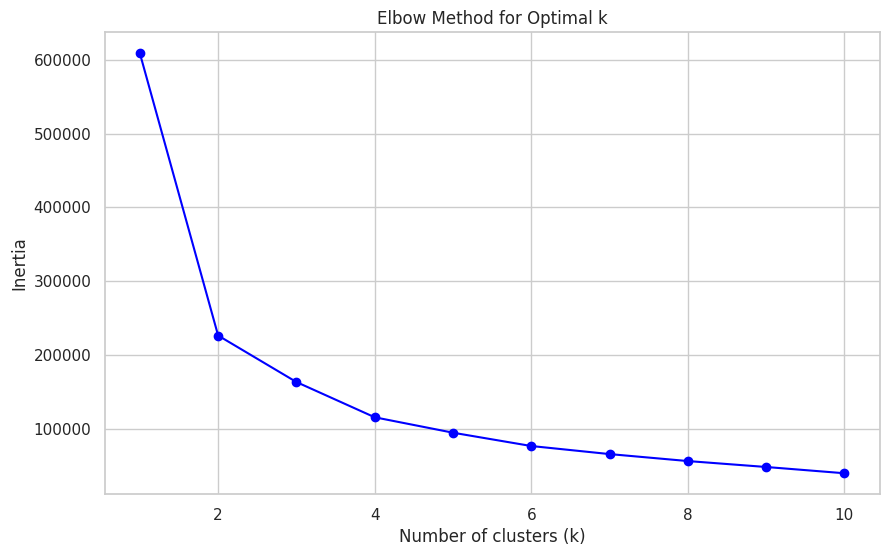

In [87]:
# create inertia plot for achieve best cluster

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))

plt.plot(k_values, inertia, 'bo-')

plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.show()

Based on the plot above we can take clusters with a rather slow decline, which is 3 clusters

In [88]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)

cluster_labels = kmeans.fit_predict(features_pca)

In [89]:
silhouette_avg = silhouette_score(features_pca, cluster_labels)

In [90]:
silhouette_avg

0.5271294235356659

1. 0.7: Strong cluster structure
2. 0.5 - 0.7: Reasonable cluster structure
3. 0.25 - 0.5: The cluster structure is weak and could be artificial
4. < 0.25: No substantial cluster structure was found


In [91]:
df_segmentation['cluster'] = cluster_labels

In [92]:
df_pca = pd.DataFrame(features_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df_segmentation['cluster']

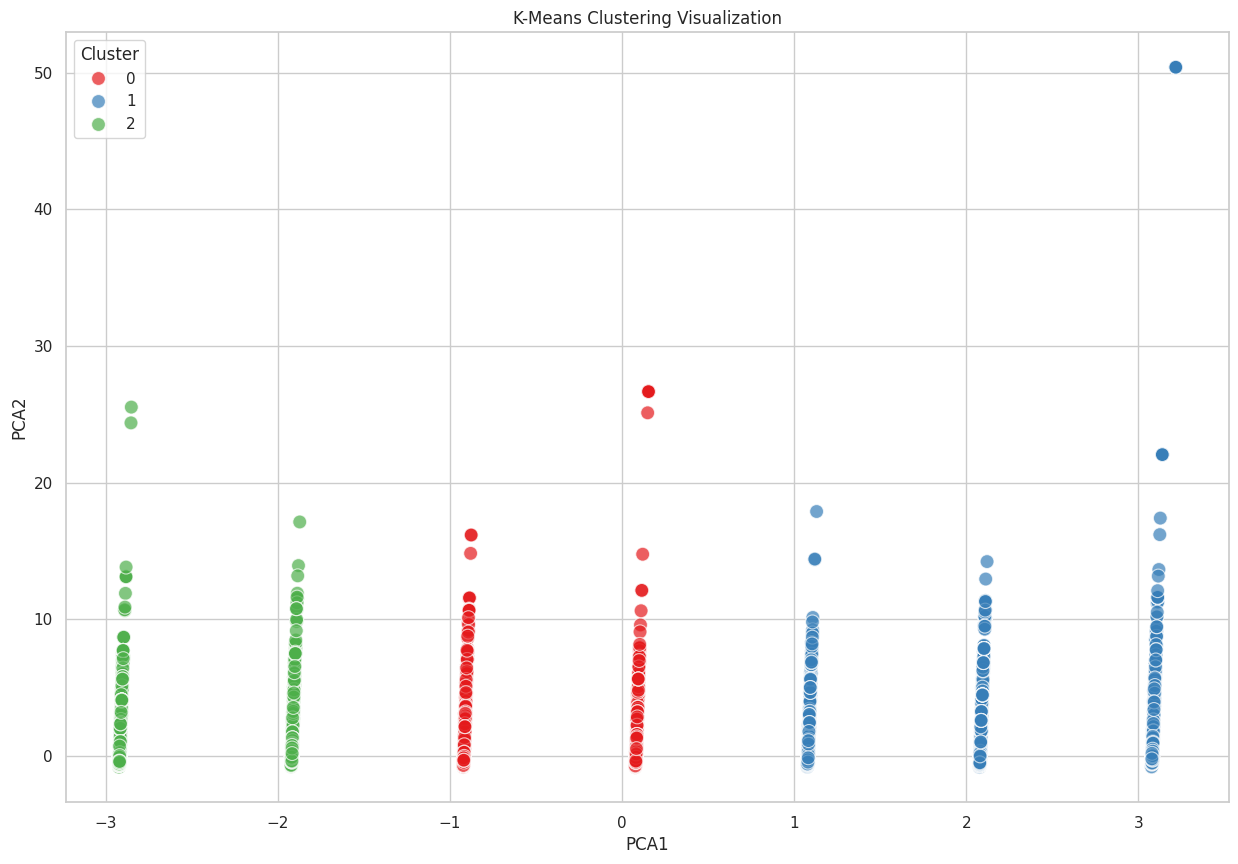

In [93]:
plt.figure(figsize=(15, 10))

sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='Set1', s=100, alpha=0.7)

plt.title('K-Means Clustering Visualization')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')

plt.show()

0.7: Strong cluster structure
0.5 - 0.7: Reasonable cluster structure
0.25 - 0.5: The cluster structure is weak and could be artificial
< 0.25: No substantial cluster structure was found

In [94]:
df_segmentation['cluster'].value_counts()

,count
cluster,
1,47814
2,36879
0,31003


In [95]:
df_segmentation

,customer_city,customer_state,payment_type,payment_value,product_category_name,seller_city,seller_state,purchase_time_day_name,purchase_time,cluster
0,sao paulo,SP,credit_card,18.12,housewares,maua,SP,Monday,morning,1
1,sao paulo,SP,voucher,2.00,housewares,maua,SP,Monday,morning,1
2,sao paulo,SP,voucher,18.59,housewares,maua,SP,Monday,morning,1
3,barreiras,BA,boleto,141.46,perfumery,belo horizonte,SP,Tuesday,evening,2
4,vianopolis,GO,credit_card,179.12,auto,guariba,SP,Wednesday,morning,2
...,...,...,...,...,...,...,...,...,...,...
115691,praia grande,SP,credit_card,195.00,baby,tupa,SP,Tuesday,afternoon,2
115692,nova vicosa,BA,credit_card,271.01,home_appliances_2,sao paulo,SP,Sunday,afternoon,0
115693,japuiba,RJ,credit_card,441.16,computers_accessories,ilicinea,MG,Monday,evening,1
115694,japuiba,RJ,credit_card,441.16,computers_accessories,ilicinea,MG,Monday,evening,1


In [96]:
df_segmentation_cluster_0 = df_segmentation[df_segmentation['cluster']==0]
df_segmentation_cluster_1 = df_segmentation[df_segmentation['cluster']==1]
df_segmentation_cluster_2 = df_segmentation[df_segmentation['cluster']==2]

In [97]:
df_segmentation_cluster_0.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_city,31003,2528,sao paulo,5008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_state,31003,27,SP,13207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_type,31003,4,credit_card,23216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_value,31003.0,NaN,NaN,NaN,168.743814,249.377642,0.0,60.75,107.5,185.735,7274.88
product_category_name,31003,72,bed_bath_table,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_city,31003,494,sao paulo,7641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,31003,22,SP,22192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_time_day_name,31003,2,Thursday,17277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_time,31003,4,afternoon,11670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,31003.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df_segmentation_cluster_1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_city,47814,3029,sao paulo,7309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_state,47814,27,SP,19934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_type,47814,4,credit_card,35546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_value,47814.0,NaN,NaN,NaN,173.477637,297.180901,0.0,60.95,108.64,189.56,13664.08
product_category_name,47814,71,bed_bath_table,4887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_city,47814,529,sao paulo,11848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,47814,22,SP,34137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_time_day_name,47814,3,Monday,18799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_time,47814,4,afternoon,18833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,47814.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [99]:
df_segmentation_cluster_2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_city,36879,2790,sao paulo,5980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_state,36879,27,SP,15659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_type,36879,4,credit_card,26602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_value,36879.0,NaN,NaN,NaN,172.240742,233.722866,0.0,60.63,108.12,191.125,6922.21
product_category_name,36879,71,bed_bath_table,3728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_city,36879,503,sao paulo,9151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,36879,22,SP,26218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_time_day_name,36879,2,Tuesday,18787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_time,36879,4,afternoon,14305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,36879.0,NaN,NaN,NaN,2.0,0.0,2.0,2.0,2.0,2.0,2.0


**conclusion**:


Based on the cluster above, it can be seen that:

1. For the first cluster (0), customers are mostly located in the SP state, specifically in the city of Sao Paulo and buy goods from sellers who are located in the same location. Then, in this cluster, customers mostly use credit cards to make payments. In this cluster, customers more often order products in the bed_bath_table category. For ordering times, this cluster usually orders on Thursday at noon. The average sales obtained from this cluster is around 168.7.

2. For the second cluster (1), the only difference lies in the day the customer usually places the order, namely Monday at noon. Apart from that, the average sales obtained from this cluster is around 173.4, which is the highest sales compared to other clusters.

3. For the third cluster (2), the only difference lies in the day the customer usually places the order, namely on Tuesday at noon. Apart from that, the average sales obtained from this cluster is around 172.2, which is higher than the first cluster (0)

### EXECUTIVE SUMMARY

Based on the analysis above, it can be concluded that to increase sales or transactions in e-commerce we can do the following:

**Carry out promotions on larger bed_bath_table category products to customers located in the SP state and provide discounts on Mondays. Also provide thoughtful offers to customers and sellers at that location, for example offering cheaper limited postage vouchers to attract more customer attention.**

## Data preprocessing

In this step, we will try to make predictions about the time the product ordered by the customer will arrive, because the estimates given in the dataset are deemed unreasonable, such as the goods arriving on the same day, it is estimated that they will arrive a month later.

In [100]:
# take several features that are relevant for modeling

df_ecommerce_final = df_ecommerce[[
    'order_id',
    'customer_city',
    'customer_state',
    'payment_type',
    'payment_value',
    'product_category_name',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'seller_city',
    'seller_state',
    'purchase_time_day_name',
    'purchase_time_hour',
    'purchase_time',
    'delivery_day_time'
]]

In [101]:
df_ecommerce_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115699 entries, 0 to 115698
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                115699 non-null  object 
 1   customer_city           115699 non-null  object 
 2   customer_state          115699 non-null  object 
 3   payment_type            115696 non-null  object 
 4   payment_value           115696 non-null  float64
 5   product_category_name   115699 non-null  object 
 6   product_weight_g        115679 non-null  float64
 7   product_length_cm       115679 non-null  float64
 8   product_height_cm       115679 non-null  float64
 9   product_width_cm        115679 non-null  float64
 10  seller_city             115699 non-null  object 
 11  seller_state            115699 non-null  object 
 12  purchase_time_day_name  115699 non-null  object 
 13  purchase_time_hour      115699 non-null  int32  
 14  purchase_time       

In [102]:
df_ecommerce_final.order_id.describe().T

,order_id
count,115699
unique,96455
top,895ab968e7bb0d5659d16cd74cd1650c
freq,63


In [103]:
# drop duplication
df_ecommerce_final = df_ecommerce_final.drop_duplicates(subset=['order_id']).reset_index(drop=True)
df_ecommerce_final.shape

(96455, 16)

In [104]:
df_ecommerce_final.isna().sum()

,0
order_id,0
customer_city,0
customer_state,0
payment_type,1
payment_value,1
product_category_name,0
product_weight_g,16
product_length_cm,16
product_height_cm,16
product_width_cm,16


In [105]:
# drop missing value
df_ecommerce_final = df_ecommerce_final.dropna().reset_index(drop=True)

In [106]:
df_ecommerce_final.isna().sum()

,0
order_id,0
customer_city,0
customer_state,0
payment_type,0
payment_value,0
product_category_name,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [107]:
df_ecommerce_final = df_ecommerce_final.drop(columns=['order_id'])

In [108]:
df_ecommerce_final.head()

,customer_city,customer_state,payment_type,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,purchase_time_day_name,purchase_time_hour,purchase_time,delivery_day_time
0,sao paulo,SP,credit_card,18.12,housewares,500.0,19.0,8.0,13.0,maua,SP,Monday,10,morning,8
1,barreiras,BA,boleto,141.46,perfumery,400.0,19.0,13.0,19.0,belo horizonte,SP,Tuesday,20,evening,12
2,vianopolis,GO,credit_card,179.12,auto,420.0,24.0,19.0,21.0,guariba,SP,Wednesday,8,morning,9
3,sao goncalo do amarante,RN,credit_card,72.20,pet_shop,450.0,30.0,10.0,20.0,belo horizonte,MG,Saturday,19,evening,14
4,santo andre,SP,credit_card,28.62,stationery,250.0,51.0,15.0,15.0,mogi das cruzes,SP,Tuesday,21,evening,3


### Transforming Categorical Columns

In [109]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

In [110]:
categorical_columns = df_ecommerce_final.select_dtypes(include='object')

In [111]:
categorical_columns.head()

,customer_city,customer_state,payment_type,product_category_name,seller_city,seller_state,purchase_time_day_name,purchase_time
0,sao paulo,SP,credit_card,housewares,maua,SP,Monday,morning
1,barreiras,BA,boleto,perfumery,belo horizonte,SP,Tuesday,evening
2,vianopolis,GO,credit_card,auto,guariba,SP,Wednesday,morning
3,sao goncalo do amarante,RN,credit_card,pet_shop,belo horizonte,MG,Saturday,evening
4,santo andre,SP,credit_card,stationery,mogi das cruzes,SP,Tuesday,evening


In [112]:
non_ordinal_categorical_columns = list(categorical_columns.select_dtypes(include='object').columns.difference(['purchase_time_day_name', 'purchase_time']))

In [113]:
# perform transformations for non-ordinal features
target_encoder = TargetEncoder()
df_encoded = target_encoder.fit_transform(categorical_columns[non_ordinal_categorical_columns], df_ecommerce_final['delivery_day_time'])

In [114]:
df_encoded.head()

,customer_city,customer_state,payment_type,product_category_name,seller_city,seller_state
0,7.557136,8.212657,12.100928,10.582630,8.661972,11.784641
1,18.284830,18.714066,11.640849,11.401237,11.635269,11.784641
2,11.832944,14.920797,12.100928,11.764241,14.541629,11.784641
3,13.514018,18.704641,12.100928,10.898335,11.635269,12.329933
4,7.349614,8.212657,12.100928,12.292390,11.274247,11.784641


In [115]:
# perform transformations for ordinal features
label_encoders = {}
for col in ['purchase_time_day_name', 'purchase_time']:
    le = LabelEncoder()
    categorical_columns[col] = le.fit_transform(categorical_columns[col])
    label_encoders[col] = le

In [116]:
df_categorical = pd.concat([categorical_columns[['purchase_time_day_name', 'purchase_time']], df_encoded], axis=1).reset_index(drop=True)

In [117]:
df_categorical

,purchase_time_day_name,purchase_time,customer_city,customer_state,payment_type,product_category_name,seller_city,seller_state
0,1,2,7.557136,8.212657,12.100928,10.582630,8.661972,11.784641
1,5,1,18.284830,18.714066,11.640849,11.401237,11.635269,11.784641
2,6,2,11.832944,14.920797,12.100928,11.764241,14.541629,11.784641
3,2,1,13.514018,18.704641,12.100928,10.898335,11.635269,12.329933
4,5,1,7.349614,8.212657,12.100928,12.292390,11.274247,11.784641
...,...,...,...,...,...,...,...,...
96433,4,2,7.965517,8.212657,12.100928,11.515046,11.703529,11.784641
96434,5,0,10.149502,8.212657,12.100928,12.190080,13.866100,11.784641
96435,3,0,13.678457,18.714066,12.100928,13.261062,10.700197,11.784641
96436,1,1,12.936439,14.784806,12.100928,12.538462,13.127325,12.329933


### Transforming Numerical Columns

In [118]:
numerical_columns = df_ecommerce_final.columns.difference(df_categorical.columns)

In [119]:
df_final = pd.concat([df_ecommerce_final[numerical_columns], df_categorical], axis=1)

In [120]:
df_final.head()

,delivery_day_time,payment_value,product_height_cm,product_length_cm,product_weight_g,product_width_cm,purchase_time_hour,purchase_time_day_name,purchase_time,customer_city,customer_state,payment_type,product_category_name,seller_city,seller_state
0,8,18.12,8.0,19.0,500.0,13.0,10,1,2,7.557136,8.212657,12.100928,10.582630,8.661972,11.784641
1,12,141.46,13.0,19.0,400.0,19.0,20,5,1,18.284830,18.714066,11.640849,11.401237,11.635269,11.784641
2,9,179.12,19.0,24.0,420.0,21.0,8,6,2,11.832944,14.920797,12.100928,11.764241,14.541629,11.784641
3,14,72.20,10.0,30.0,450.0,20.0,19,2,1,13.514018,18.704641,12.100928,10.898335,11.635269,12.329933
4,3,28.62,15.0,51.0,250.0,15.0,21,5,1,7.349614,8.212657,12.100928,12.292390,11.274247,11.784641


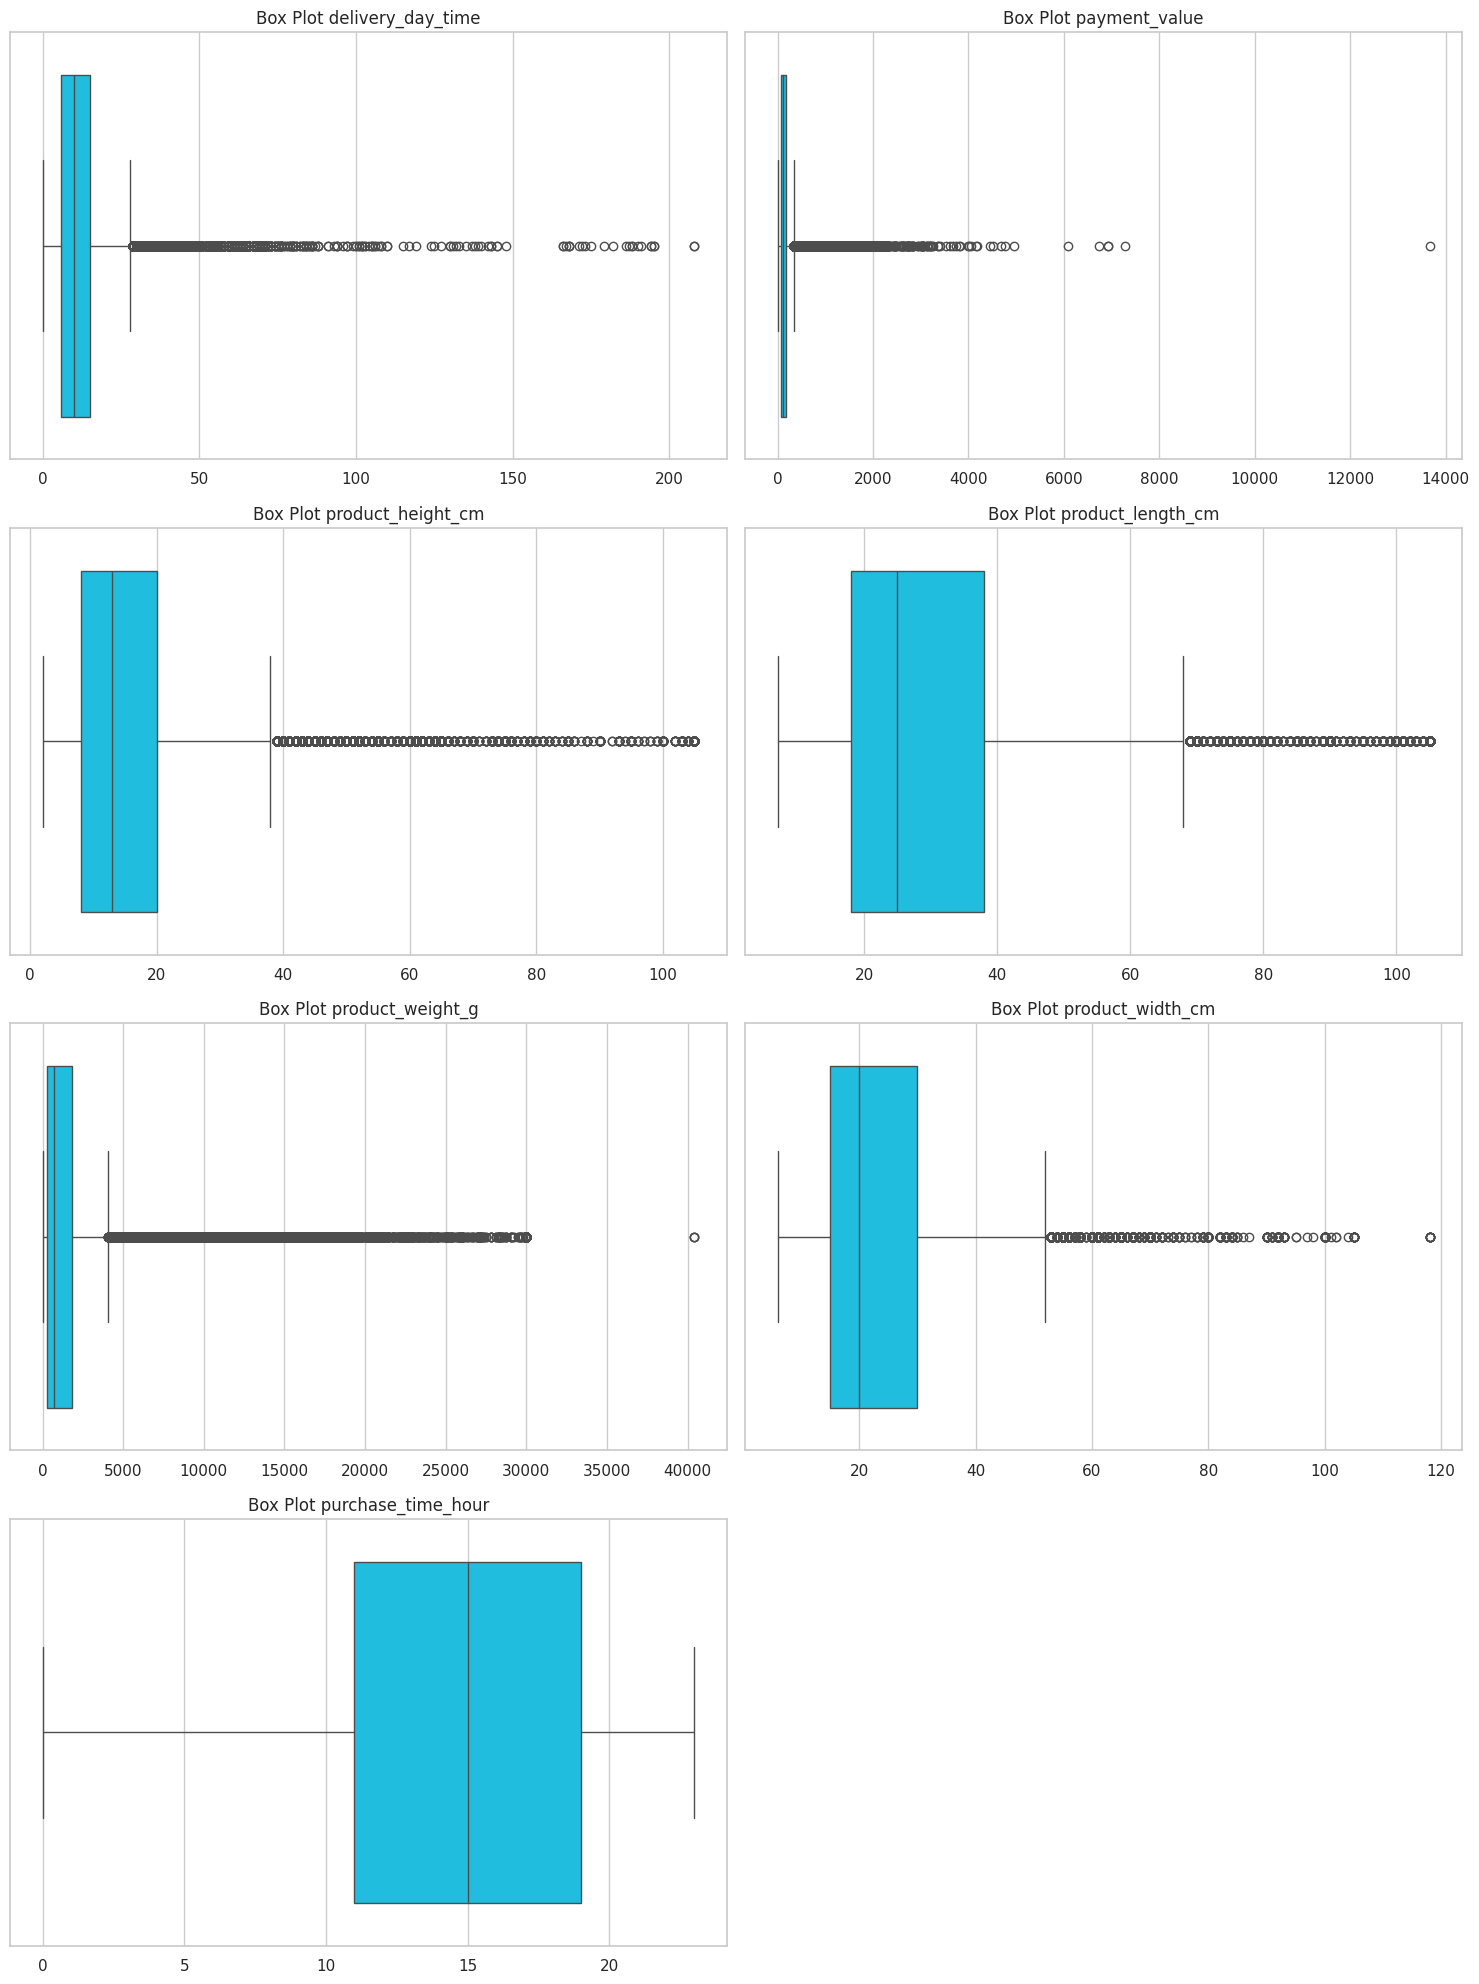

In [121]:
# see the outliers in numerical features

columns_to_plot = ['delivery_day_time', 'payment_value', 'product_height_cm', 'product_length_cm', 'product_weight_g', 'product_width_cm', 'purchase_time_hour']

# Count the number of rows and columns for the subplot
n_cols = 2
n_rows = (len(columns_to_plot) + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()  # Flatten array of axes for ease of iteration

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df_final[column], ax=axes[i])
    axes[i].set_title(f'Box Plot {column}')
    axes[i].set_xlabel('')

# Delete unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [122]:
def identify_outliers(df, columns):
    outlier_info = {}

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        outlier_info[column] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': len(outliers),
            'outlier_indices': outliers.index.tolist()
        }

        print(f"\nKolom: {column}")
        print(f"Lower bound: {lower_bound}")
        print(f"Upper bound: {upper_bound}")
        print(f"Jumlah outlier: {len(outliers)}")

    return outlier_info

In [123]:
outlier_results = identify_outliers(df_final, columns_to_plot)


Kolom: delivery_day_time
Lower bound: -7.5
Upper bound: 28.5
Jumlah outlier: 4947

Kolom: payment_value
Lower bound: -111.9375
Upper bound: 346.5625
Jumlah outlier: 7479

Kolom: product_height_cm
Lower bound: -10.0
Upper bound: 38.0
Jumlah outlier: 6431

Kolom: product_length_cm
Lower bound: -12.0
Upper bound: 68.0
Jumlah outlier: 3087

Kolom: product_weight_g
Lower bound: -1950.0
Upper bound: 4050.0
Jumlah outlier: 13699

Kolom: product_width_cm
Lower bound: -7.5
Upper bound: 52.5
Jumlah outlier: 2194

Kolom: purchase_time_hour
Lower bound: -1.0
Upper bound: 31.0
Jumlah outlier: 0


Outliers will be removed because there are not too many of them so as not to interfere with the modeling process

In [124]:
df_clean = df_final.copy()

all_outlier_indices = set()

for column, info in outlier_results.items():
    all_outlier_indices.update(info['outlier_indices'])

df_clean = df_clean.drop(index=list(all_outlier_indices))

print(f"\nThe amount of data before removing outliers: {len(df_final)}")
print(f"The amount of data after removing outliers: {len(df_clean)}")


The amount of data before removing outliers: 96438
The amount of data after removing outliers: 71397


In [125]:
df_final = df_clean.copy()

### Feature Selection

**categorical**


For categorical columns we will use ANOVA to perform feature selection

In [126]:
categorical_columns = df_final[['purchase_time_day_name', 'purchase_time']].copy()

In [127]:
categorical_columns['purchase_time'] = categorical_columns['purchase_time'].astype('str')
categorical_columns['purchase_time_day_name'] = categorical_columns['purchase_time_day_name'].astype('str')

In [128]:
categorical_columns['delivery_day_time'] = df_final['delivery_day_time']

In [129]:
from scipy.stats import f_oneway

def one_way_anova(df, feature, target):
    groups = df.groupby(feature)[target].apply(list)
    f_value, p_value = f_oneway(*groups)
    return f_value, p_value

In [130]:
results = {}
for column in categorical_columns.columns.difference(['delivery_day_time']):
  f_value, p_value = one_way_anova(categorical_columns, column, 'delivery_day_time')
  results[column] = {'F-value': f_value, 'p-value': p_value}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('p-value')

In [131]:
results_df

,F-value,p-value
purchase_time_day_name,79.381558,2.339501e-99
purchase_time,20.508456,2.811047e-13


Features with a p-value < alpha (usually 0.05) are considered to have a significant influence on the target. Therefore, all categorical features will be used in modeling

**numerical**

In [132]:
numerical_columns = df_final.columns.difference(['purchase_time_day_name', 'purchase_time'])

In [133]:
numerical_columns

Index(['customer_city', 'customer_state', 'delivery_day_time', 'payment_type',
       'payment_value', 'product_category_name', 'product_height_cm',
       'product_length_cm', 'product_weight_g', 'product_width_cm',
       'purchase_time_hour', 'seller_city', 'seller_state'],
      dtype='object')

In [134]:
correlation = df_final[numerical_columns].corr().abs()
mask = np.triu(np.ones_like(correlation, dtype=bool))

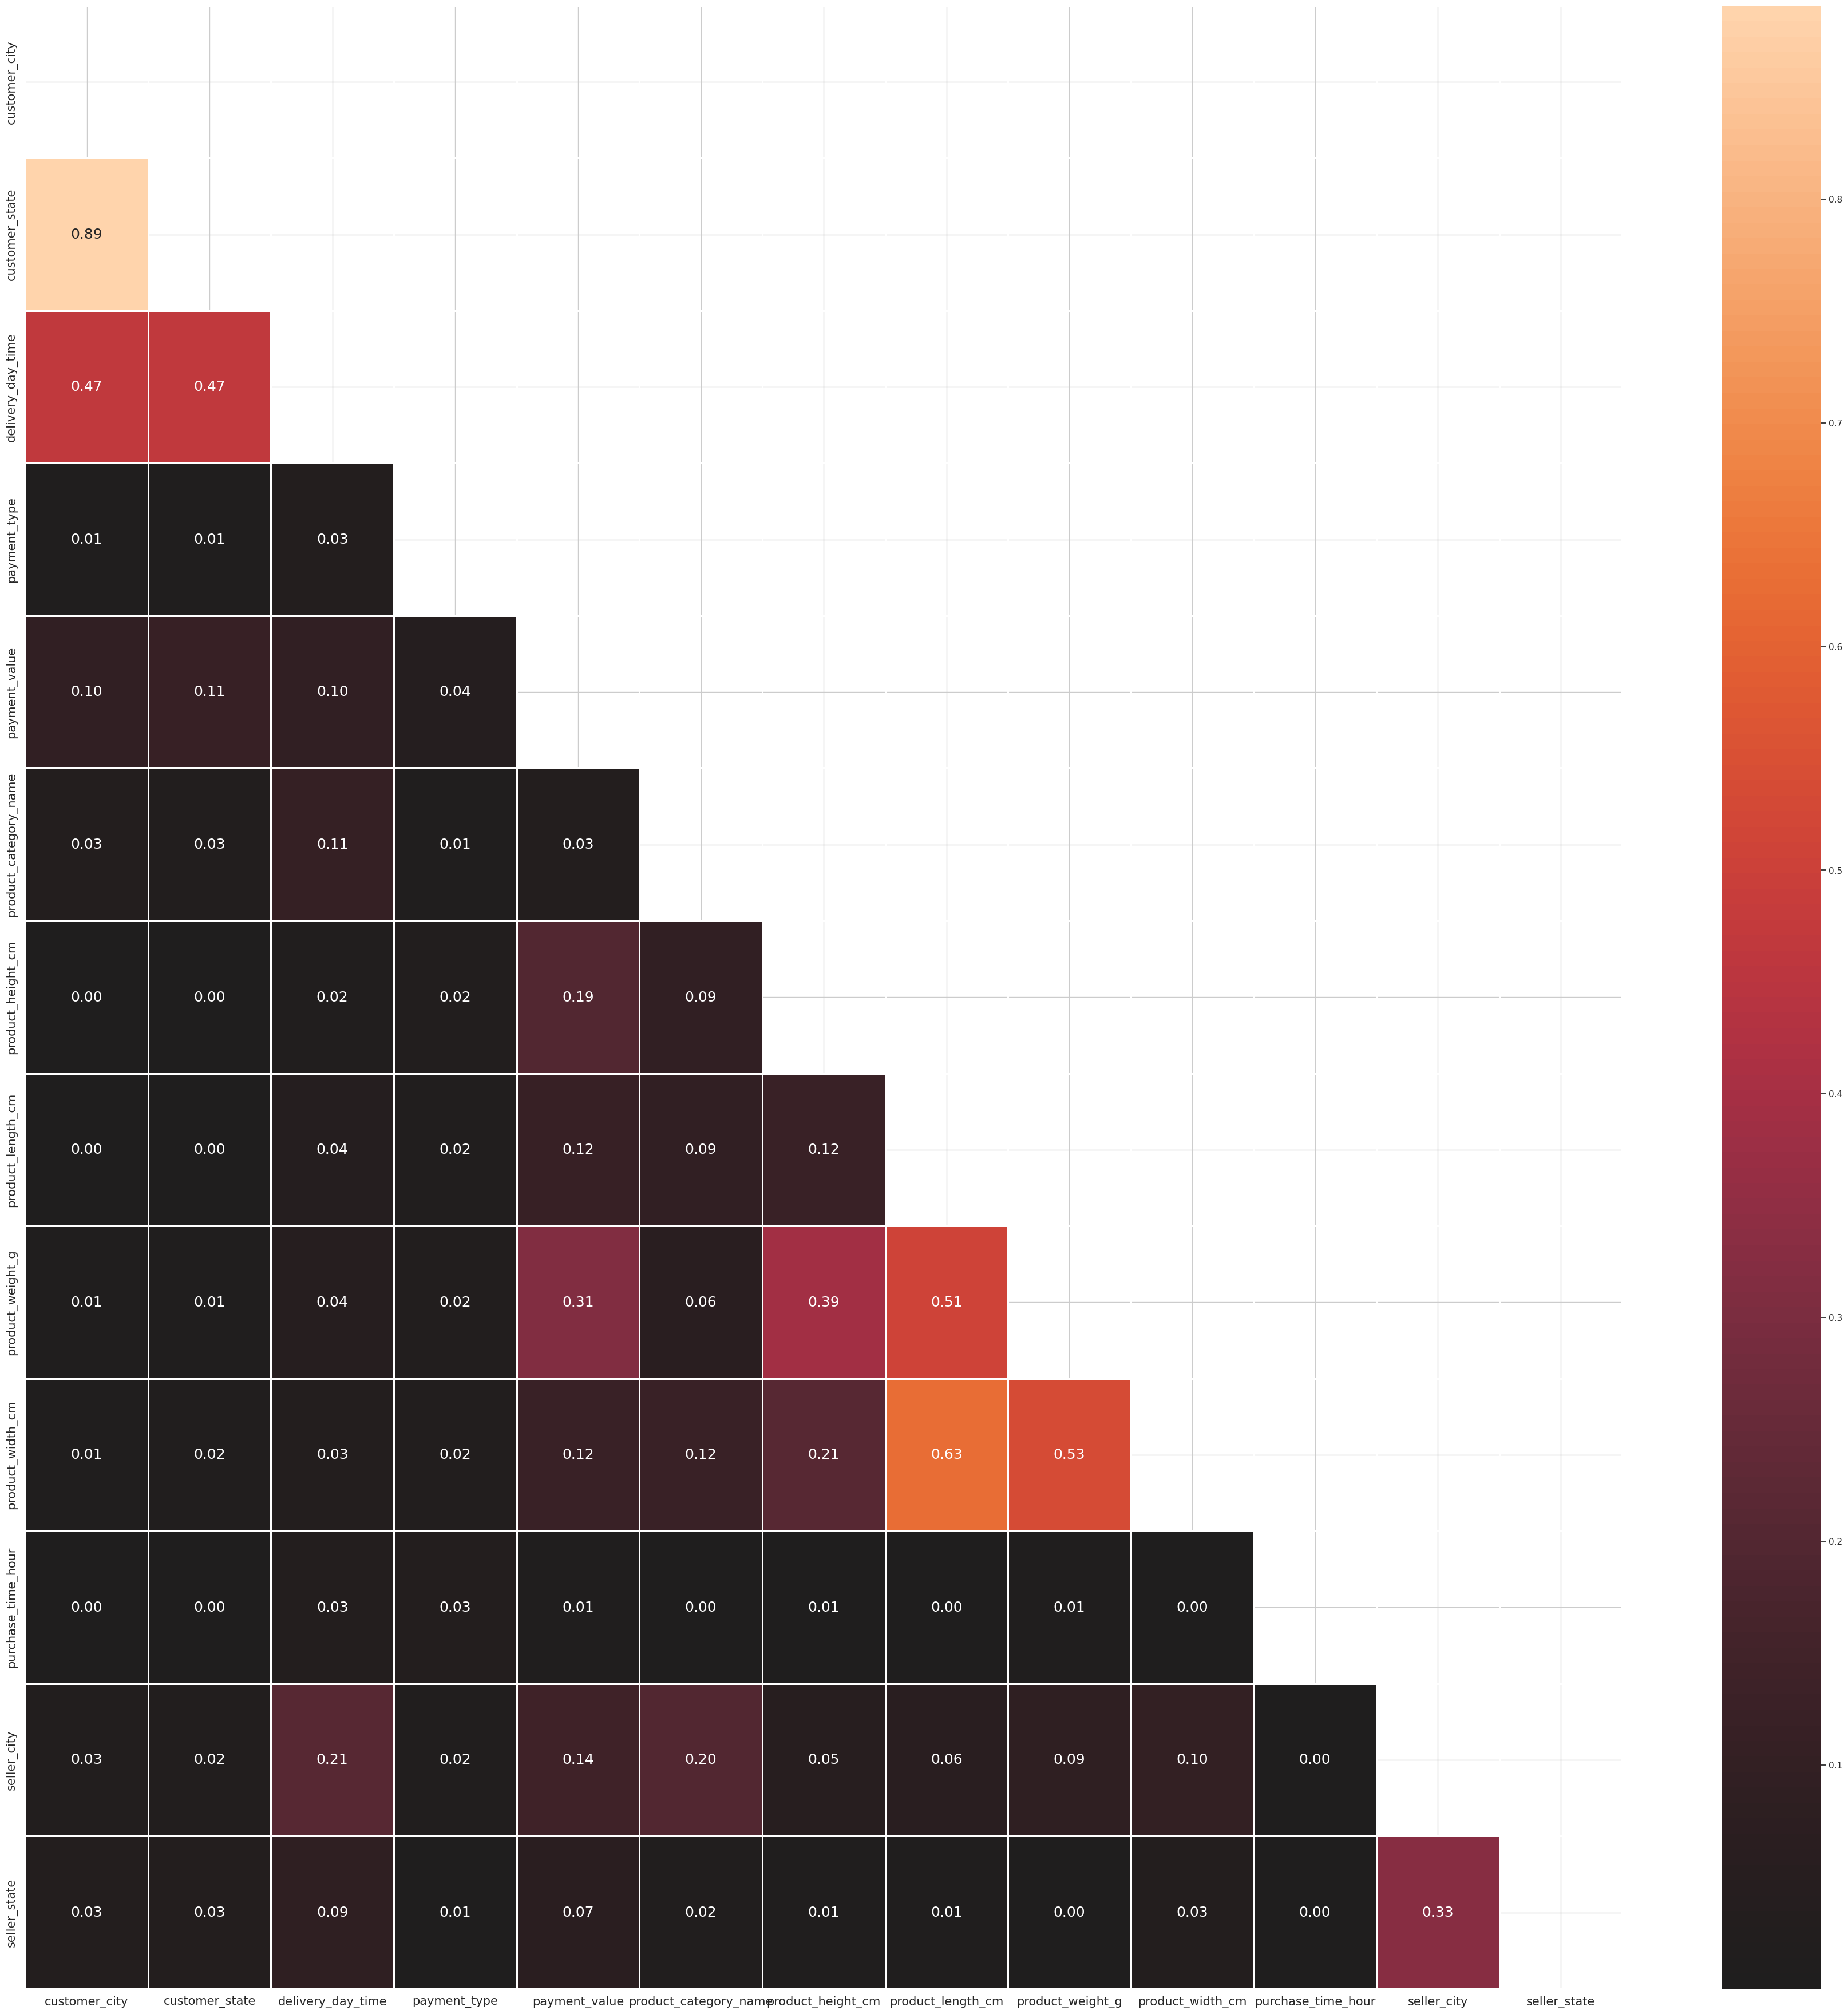

In [135]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    mask=mask,
    center=0,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    fmt='.2f',
    linewidths=1,
    annot_kws={'size': 18}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [136]:
corr_mask = correlation.mask(mask)

In [137]:
to_drop = [c for c in corr_mask.columns if any(corr_mask[c] > 0.95)]

In [138]:
to_drop

[]

All numerical columns will be used because there is no correlation of features that exceeds 95% with the target feature, namely delivery_day_time

### Splitting Data

In [139]:
df_final.head()

,delivery_day_time,payment_value,product_height_cm,product_length_cm,product_weight_g,product_width_cm,purchase_time_hour,purchase_time_day_name,purchase_time,customer_city,customer_state,payment_type,product_category_name,seller_city,seller_state
0,8,18.12,8.0,19.0,500.0,13.0,10,1,2,7.557136,8.212657,12.100928,10.582630,8.661972,11.784641
1,12,141.46,13.0,19.0,400.0,19.0,20,5,1,18.284830,18.714066,11.640849,11.401237,11.635269,11.784641
2,9,179.12,19.0,24.0,420.0,21.0,8,6,2,11.832944,14.920797,12.100928,11.764241,14.541629,11.784641
3,14,72.20,10.0,30.0,450.0,20.0,19,2,1,13.514018,18.704641,12.100928,10.898335,11.635269,12.329933
4,3,28.62,15.0,51.0,250.0,15.0,21,5,1,7.349614,8.212657,12.100928,12.292390,11.274247,11.784641


In [140]:
from sklearn.model_selection import train_test_split

# dividing data into, train data, validation, and testing
train_df, test_df = train_test_split(df_final, test_size=0.1, shuffle=True)
train_df, val_df = train_test_split(train_df, test_size=0.2, shuffle=True)

In [141]:
numerical_columns = df_final.columns.difference(['purchase_time_day_name', 'purchase_time', 'delivery_day_time'])
other_columns = df_final.columns.difference(numerical_columns)

In [142]:
train_df_numerical = train_df[numerical_columns].reset_index(drop=True)
train_df = train_df[other_columns].reset_index(drop=True)

val_df_numerical = val_df[numerical_columns].reset_index(drop=True)
val_df = val_df[other_columns].reset_index(drop=True)

test_df_numerical = test_df[numerical_columns].reset_index(drop=True)
test_df = test_df[other_columns].reset_index(drop=True)

In [143]:
# standardize numerical features so that models are more efficient in learning data

std = StandardScaler()
train_df_numerical = std.fit_transform(train_df_numerical)
val_df_numerical = std.transform(val_df_numerical)
test_df_numerical = std.transform(test_df_numerical)

In [144]:
train_df_numerical = pd.DataFrame(train_df_numerical, columns=numerical_columns)
val_df_numerical = pd.DataFrame(val_df_numerical, columns=numerical_columns)
test_df_numerical = pd.DataFrame(test_df_numerical, columns=numerical_columns)

In [145]:
train_df = pd.concat([train_df, train_df_numerical], axis=1)
val_df = pd.concat([val_df, val_df_numerical], axis=1)
test_df = pd.concat([test_df, test_df_numerical], axis=1)

# Modeling

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

In [147]:
X_train = train_df.drop(columns=['delivery_day_time'])
y_train = train_df['delivery_day_time']

In [148]:
X_val = val_df.drop(columns=['delivery_day_time'])
y_val = val_df['delivery_day_time']

In [149]:
X_test = test_df.drop(columns=['delivery_day_time'])
y_test = test_df['delivery_day_time']

In this experiment, 3 base models will be used, namely randomforest regressor, adaboost regressor, and gradientboosting regressor to choose which model is the best based on MAE scoring.

In [150]:
for_ada = DecisionTreeRegressor(max_depth=1, random_state=42)

models = {
  'ada': AdaBoostRegressor(base_estimator=for_ada, random_state=42),
  'rf': RandomForestRegressor(random_state=42),
  'gb': GradientBoostingRegressor(random_state=42)
}

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

result = []
for model in models.values():
  kf = KFold(n_splits=6, shuffle=True, random_state=42)
  cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=mae_scorer)
  result.append(cv_results)

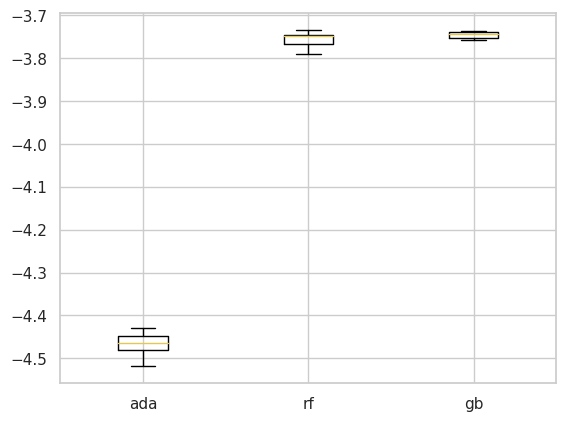

In [151]:
plt.boxplot(result, labels=models.keys())
plt.show()

Based on the plot above, it can be seen that the median of MAE in the cross validation process on 6 folds in the gradient boosting model is better than other models. Therefore, hyperparameter tuning will be carried out on this model to be used later in the data training and inference processes

In [152]:
steps_gb = [('gb', GradientBoostingRegressor(random_state=42))]
pipeline_gb = Pipeline(steps=steps_gb)

parameters_gb = {
    'gb__n_estimators': [100, 200, 300, 400],
    'gb__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'gb__max_depth': [3, 4, 5, 6, 7],
    'gb__min_samples_leaf': [1, 2, 3, 4]
}

kf = KFold(n_splits=6, shuffle=True, random_state=42)

cv_gb = RandomizedSearchCV(pipeline_gb, parameters_gb, cv=kf, n_iter=3, scoring='neg_mean_absolute_error')

cv_gb.fit(X_train, y_train)

print('Best score = {}'.format(cv_gb.best_score_))
print('Best parameters = {}'.format(cv_gb.best_params_))

Best score = -3.6536119111358865
Best parameters = {'gb__n_estimators': 300, 'gb__min_samples_leaf': 2, 'gb__max_depth': 7, 'gb__learning_rate': 0.1}


In [153]:
best_model = cv_gb.best_estimator_
best_model

Pipeline(steps=[('gb',
                 GradientBoostingRegressor(max_depth=7, min_samples_leaf=2,
                                           n_estimators=300,
                                           random_state=42))])

In [154]:
y_val_pred = best_model.predict(X_val)

In [155]:
print('mae: {}'.format(mean_absolute_error(y_val, y_val_pred)))

mae: 3.5832445000882194


In [156]:
y_test_pred = best_model.predict(X_test)

In [157]:
print('mae: {}'.format(mean_absolute_error(y_test, y_test_pred)))

mae: 3.6525737560014253



Based on the evaluation or MAE score on validation data and testing data, it can be seen that this value is still acceptable considering the target range, namely delivery_day time is 0 to 28

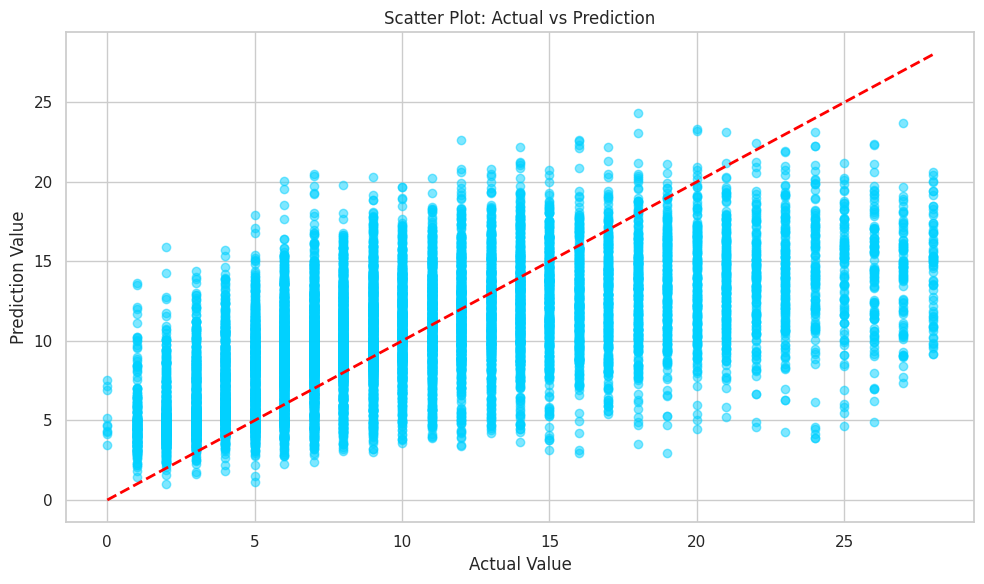

In [158]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Prediction Value')
plt.title('Scatter Plot: Actual vs Prediction')
plt.tight_layout()
plt.show()

This plot shows that although there are some predictions that are quite close to the actual values, there are also significant prediction errors, especially at larger values. It may be worth considering further tuning the model or re-evaluating the data to improve prediction performance.

In [159]:
import joblib

# save model into file
joblib.dump(cv_gb.best_estimator_, '/content/best_gb_model.pkl')

['/content/best_gb_model.pkl']